
# F24_MDSSB-MET-01-B_Data Science Tools in Python

# Session 2: Visualization
## ... with Python, NumPy/Pandas, Matplotlib and Seaborn

##### Recommended Reading: Python Data Science Handbook
##### URL: https://jakevdp.github.io/PythonDataScienceHandbook/
##### Chapter 4: Visualization with Matplotlib
##### See also: documentation for Seaborn and Pandas


##### Armin Müller, Constructor University

Welcome to visualization with Python. 
There are multiple packages with visualization functionality for Python, and each has its own strengths and weaknesses.
Usually, you can make basic plots easily (either with Seaborn or Pandas).
However, complexity increases if you want dense, complex and self-explaining plots (especially scatter plots) along with tight control of aesthetic details.
In such cases, Matplotlib may be preferable: it has the most powerfull function for scatter plots.

Pandas excels in turning tables into plots, which is good for categorical data and seamlessly links up the routines for creating tables we discussed last week.
Seaborn can adjust the general style of your document, and has simple functions that create beautiful plots.
However, while Seaborn is great for simple plots, functionality is sometimes limited, and Seaborn is still at beta-stage.

# 1. Install & Load the packages and data


On MAC: 
Download and install Java for macOS
https://www.java.com/de/download/

In [ ]:
# 1. install packages matplotlib, seaborn and nycflights13
## Mac-OS or Linux: execute this line
!pip3 install matplotlib
# better yet: open terminal and type: pip3 install matplotlib
# the "!" directs the command to the terminal

!pip3 install seaborn
!pip3 install nycflights13

In [1]:
# get the numpy package
import numpy as np

In [2]:
# Get the Pandas package and make copy-on-write the default!!!!
import pandas as pd
pd.options.mode.copy_on_write = True
pd.__version__ # should be mature

'2.2.2'

Explainer: Why is the copy-on-write option important?

In current and older versions of pandas, subsetting or indexing can create either a copy or a reference (view) of the original DataFrame, and there was some ambiguity about which one was created in each case. This could lead to situations where you think you're changing just a subset of the data, but you unintentionally end up modifying the original dataset as well, which can cause confusion and problems. Copy-on-Write will eliminate this concern (in many but not all scenarios) because it ensures that any modifications to a subset automatically create a copy of the data, leaving the original untouched. Copy-on-Write will become the new default in pandas 3.0. 

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Additional note: To be omn the safe side, you still want to use .copy() when you create a copy of a data set.

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.__version__ # should be mature

'3.9.1'

In [4]:
import seaborn as sns
sns.__version__  # still at beta stage

'0.13.2'

In [5]:
# load the data
from nycflights13 import flights

# get a subset for September
flights_sep = flights[(flights['month']==9)].copy() # note: copy creates an independent copy 
# This is important if copy-on-write is not activated, otherwise it is redundant.
flights_sep


year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
309202  2013      9    1       9.0            2359       10.0     343.0   
309203  2013      9    1     117.0            2245      152.0     218.0   
309204  2013      9    1     508.0             516       -8.0     717.0   
309205  2013      9    1     537.0             545       -8.0     849.0   
309206  2013      9    1     537.0             545       -8.0     906.0   
...      ...    ...  ...       ...             ...        ...       ...   
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
309202             340        3.0      B6     839  N663JB    JFK  BQN   
309203            2359      139.0      B6    1816  N216JB    JFK  SYR   
309204             800      -43.0      UA    1545  N57869    EWR  IAH   
309205             855       -6.0      AA     701  N613AA    JFK  MIA   
309206             921      -15.0      B6     939  N658JB    JFK  BQN   
...                ...        ...     ...     ...     ...    ...  ...   
336771            1634        NaN      9E    3393     NaN    JFK  DCA   
336772            2312        NaN      9E    3525     NaN    LGA  SYR   
336773            1330        NaN      MQ    3461  N535MQ    LGA  BNA   
336774            1344        NaN      MQ    3572  N511MQ    LGA  CLE   
336775            1020        NaN      MQ    3531  N839MQ    LGA  RDU   

        air_time  distance  hour  minute             time_hour  
309202     196.0      1576    23      59  2013-09-02T03:00:00Z  
309203      44.0       209    22      45  2013-09-02T02:00:00Z  
309204     170.0      1400     5      16  2013-09-01T09:00:00Z  
309205     148.0      1089     5      45  2013-09-01T09:00:00Z  
309206     191.0      1576     5      45  2013-09-01T09:00:00Z  
...          ...       ...   ...     ...                   ...  
336771       NaN       213    14      55  2013-09-30T18:00:00Z  
336772       NaN       198    22       0  2013-10-01T02:00:00Z  
336773       NaN       764    12      10  2013-09-30T16:00:00Z  
336774       NaN       419    11      59  2013-09-30T15:00:00Z  
336775       NaN       431     8      40  2013-09-30T12:00:00Z  

[27574 rows x 19 columns]

# 2. Set a style for your document

In Seaborn, you can set a coherent plot style that applies throughout your document. This is helpful in brushing up the default style of Matplotlib, and in keeping coherence accross the document.

Feel free to explore different options.

In [23]:
sns.set_theme(context='notebook',
              style = 'whitegrid',
              palette = 'hls', # you might want to do it for each plot separately 
              font='Times New Roman',
              font_scale = 0.8 # adjust the font size
              )

## 2.1 Fonts

The fonts are easy to handle in Python. You can get a list of the available system fonts and use them directly. Use the matplotlib font manager to get a list:

In [ ]:
# get a list of the available fonts on your system
mpl.font_manager.findSystemFonts()

['/System/Library/AssetsV2/com_apple_MobileAsset_Font7/6f4c91728bb824d6960725ec479c355eab7eeba8.asset/AssetData/NanumScript.ttc',
 '/System/Library/Fonts/Supplemental/Andale Mono.ttf',
 '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/12cc699be28fb04f3e3c4969a0378a87b920b174.asset/AssetData/BMHannaAir-Regular.otf',
 '/System/Library/Fonts/Supplemental/STIXIntUpSmReg.otf',
 '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/b86e58f38fd21e9782e70a104676f1655e72ebab.asset/AssetData/Yuanti.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansBamum-Regular.ttf',
 '/System/Library/Fonts/Supplemental/KufiStandardGK.ttc',
 '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/a3f9a9e35bdf3babe03b2fd162051306fad439d6.asset/AssetData/Osaka.ttf',
 '/System/Library/Fonts/Supplemental/Kannada Sangam MN.ttc',
 '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/2371acc1476f56b565e773159763b5dc3b3d6a1e.asset/AssetData/BiauKai.ttf',
 '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/584ea2

## 2.2 Colors and color spaces

Color is a large topic we cannot discuss at length in this course.
Seaborn and Matplotlib allow you to use color palettes directly.

Get an overview of the color options
https://seaborn.pydata.org/tutorial/color_palettes.html

https://www.practicalpythonfordatascience.com/ap_seaborn_palette

https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [74]:
# check out basic color palettes
sns.color_palette()

[(0.0, 0.4981591003460206, 1.0),
 (0.0, 0.986936604088444, 0.368548620127168),
 (0.5182809189613916, 0.9998402909550916, 0.04680407496331866),
 (1.0, 0.8743443122968675, 0.0),
 (1.0, 0.14918899559823937, 0.0),
 (0.6912889749219927, 0.2682950819672131, 0.9811260366441659)]

In [8]:
sns.color_palette("autumn") # from red to yellow

[(1.0, 0.1411764705882353, 0.0),
 (1.0, 0.28627450980392155, 0.0),
 (1.0, 0.42745098039215684, 0.0),
 (1.0, 0.5725490196078431, 0.0),
 (1.0, 0.7137254901960784, 0.0),
 (1.0, 0.8588235294117647, 0.0)]

In [9]:
sns.color_palette("autumn_r") # from yellow to red

[(1.0, 0.8588235294117648, 0.0),
 (1.0, 0.7137254901960784, 0.0),
 (1.0, 0.5725490196078431, 0.0),
 (1.0, 0.4274509803921569, 0.0),
 (1.0, 0.28627450980392155, 0.0),
 (1.0, 0.14117647058823535, 0.0)]

In [10]:
sns.color_palette("hls", 8) # adjust the number of colors
#sns.color_palette("hls", 5)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [75]:
sns.color_palette("gist_ncar", 4)

[(0.0, 0.930796862745098, 1.0),
 (0.4537607843137255, 0.9104032258064516, 0.0),
 (1.0, 0.8066418943533695, 0.021098823529411777),
 (0.9462666666666665, 0.026863261296660175, 1.0)]

# 3. Scatter Plots

When we plot 2 metric variables, the scatter plot is a common choice. This section focuses on Matplotlib, because it has the most powerful functionality.
It also provides Seaborn code as an easier alternative. Let's start with a bare bones plot of distance and air time:

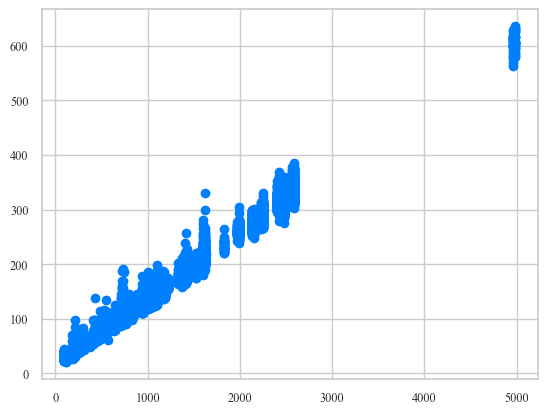

In [12]:
# Barebones scatterplot
plt.scatter(x=flights_sep['distance'], y=flights_sep['air_time'])

Next, we want a close-up on the main field of observations. The most straightforward way is to create a subset of the data for plotting.

In [7]:
# flights in September under 3000 miles and 400 minutes (created as a copy)
flights_sep2 = flights_sep[(flights_sep['distance'] < 3000) & (flights_sep['air_time'] < 400)].copy()

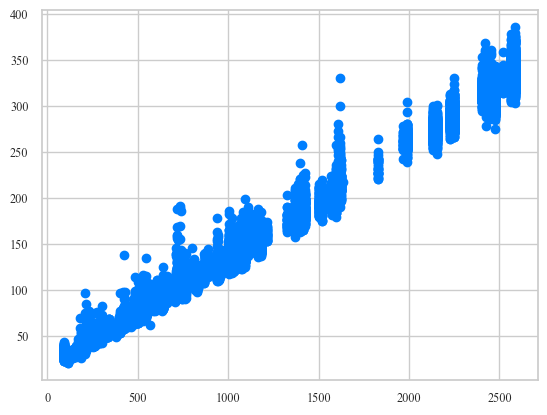

In [14]:
# Step 2: create the scatter plot
plt.scatter(x=flights_sep2['distance'], y=flights_sep2['air_time'])

For the regular adjustments of color and transparency, we can use the options color and alpha.

You can check out the colors here: 
https://matplotlib.org/stable/gallery/color/named_colors.html

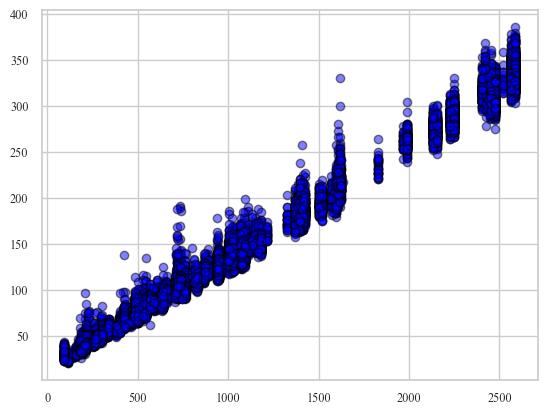

In [15]:
# let's use a focused view to avoid the outliers
plt.scatter(x=flights_sep2['distance'], y=flights_sep2['air_time'], 
            color = "blue", edgecolor = "black", alpha = 0.5)

## 3.1 Styles with metric variables
### 3.1.1 Assign a metric variable to color

You can assign a metric variable to color. Say we want to know if the flights with above-average flight time are also more delayed than normal flights ...

To do this, we need to assign a metric variable to the parameter c, and we need to load a color map with the cmap options.

Check out the color maps: https://matplotlib.org/stable/users/explain/colors/colormaps.html

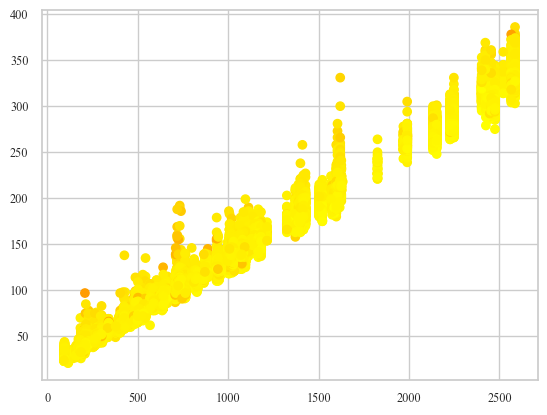

In [16]:
# scatter plot with arrival delays in the color
plt.scatter(x=flights_sep2['distance'], y=flights_sep2['air_time'], 
            c = flights_sep2['arr_delay'], # use c to assign a metric variable  to color
            cmap = plt.get_cmap('autumn_r')) # autumn_r has the yellow-to-red spectrum.

Let's use a subset of the data for better visibility:

In [8]:
# flights in September under 1000 miles and 200 minutes, with an arrival delay over 30 minutes (created as a view)
flights_sep3 = flights_sep[(flights_sep['distance'] < 1000) & (flights_sep['air_time'] < 200) & (flights_sep['arr_delay'] > 30)].copy()

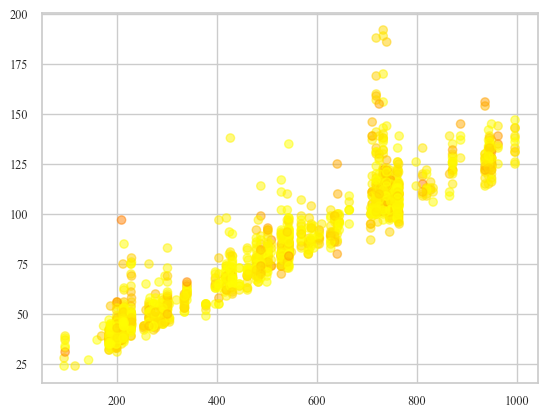

In [18]:
# scatter plot with arrival delays in the color
plt.scatter(x=flights_sep3['distance'], y=flights_sep3['air_time'], 
            c = flights_sep3['arr_delay'],
            cmap = plt.get_cmap('autumn_r'),
            alpha = 0.5)

## 3.1.2 Assign a metric variable to alpha

Now we use the transparency parameter alpha to make flights with little or no delay more transparent.
Some preparations are in order: the alpha parameter needs values between 0 and 1, here we have to arrange for that manually by normalizing it.

Normalization: we prepare a function-like object, that normalizes a variable using the maximum and minimum of arrival delay, and is then applied in the plot function to normalize arrival delay. 

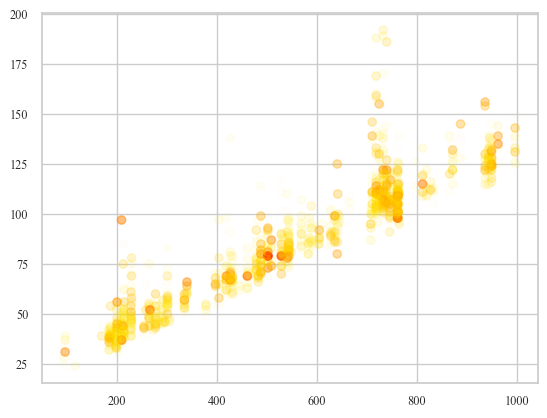

In [19]:
# Preparation:
#  Norming arrival delay --> values between 0 and 1
norm_delay = plt.Normalize(flights_sep3['arr_delay'].min(), flights_sep3['arr_delay'].max())

# scatterplot
plt.scatter(x=flights_sep3['distance'], y=flights_sep3['air_time'], 
            c = flights_sep3['arr_delay'],
            cmap = plt.get_cmap('autumn_r'),
            alpha=norm_delay(flights_sep3['arr_delay'])
            )

### 3.1.3 Assign size to a metric variable

The size parameter needs an integer, rather than a float, so we use the abs() function to get absolute values. 
We can assign three parameters to the delay: color, transparency (alpha) and size of the points. Now, flights with a worse delay have bigger, darker and less transparent points.

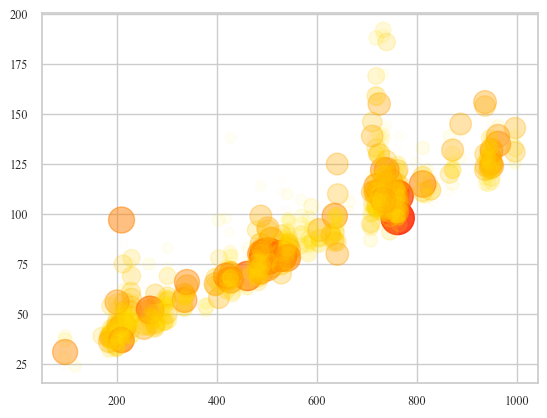

In [20]:
# Preparation:
#  Norming arrival delay --> values between 0 and 1
norm_delay = plt.Normalize(flights_sep3['arr_delay'].min(), flights_sep3['arr_delay'].max())

# create the scatterplot
plt.scatter(x=flights_sep3['distance'], y=flights_sep3['air_time'], 
            c = flights_sep3['arr_delay'],
            cmap = plt.get_cmap('autumn_r'),
            alpha=norm_delay(flights_sep3['arr_delay']),
            s=flights_sep3['arr_delay'].abs()  # Size of the points, scaled by absolute delay
            )

We can that the flights with the worst delays do not have exceptionally long flight times. Therefore, they probably departed with a delay already.


## 3.2 Make it presentable

### 3.2.1 Customize aesthetics with Matplotlib

Matplotlib's scatter plot function is powerfull, but making plots presentable is more complicated than in other packages because the legend(s) need(s) to be added manually.

Let's begin by adding the labels:

Text(1, -0.15, 'Data taken from nycflights13.')

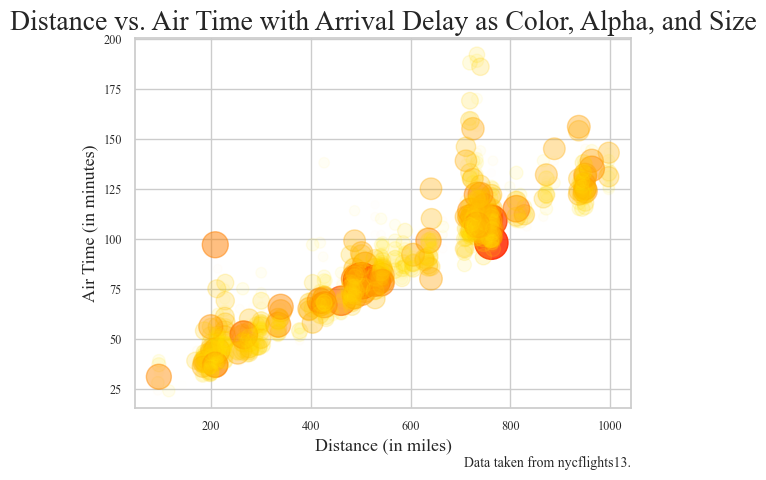

In [21]:
# Preparation:
#  Norming arrival delay --> values between 0 and 1
norm_delay = plt.Normalize(flights_sep3['arr_delay'].min(), flights_sep3['arr_delay'].max())

# create the scatterplot
plt.scatter(x=flights_sep3['distance'], y=flights_sep3['air_time'], 
            c = flights_sep3['arr_delay'],
            cmap = plt.get_cmap('autumn_r'),
            alpha=norm_delay(flights_sep3['arr_delay']),
            s=flights_sep3['arr_delay'].abs()  # Size of the points, scaled by absolute delay
            )

# Add labels and title
plt.xlabel('Distance (in miles)', fontsize = 13)
plt.ylabel('Air Time (in minutes)', fontsize = 13)
plt.title('Distance vs. Air Time with Arrival Delay as Color, Alpha, and Size', fontsize = 20)

# This line adds text with a more generalized function
plt.text(x = 1, # x coordinate
         y =  -0.15, # y coordinate
         transform=plt.gca().transAxes, # transform the axes the coordinates refer to (i.e. position on the right)
         s = 'Data taken from nycflights13.', # text
         ha='right', # horizontal alignment
         va='center', # vertical alighnment
         fontsize=10
         )


Now let's adjust the y axis to hours as units. In order to do so, we need to create a numpy array that replaces the previous ticks on the y axis.

([<matplotlib.axis.YTick at 0x125932520>,
 [Text(0, 0, '0'),
  Text(0, 60, '60'),
  Text(0, 120, '120'),
  Text(0, 180, '180')])

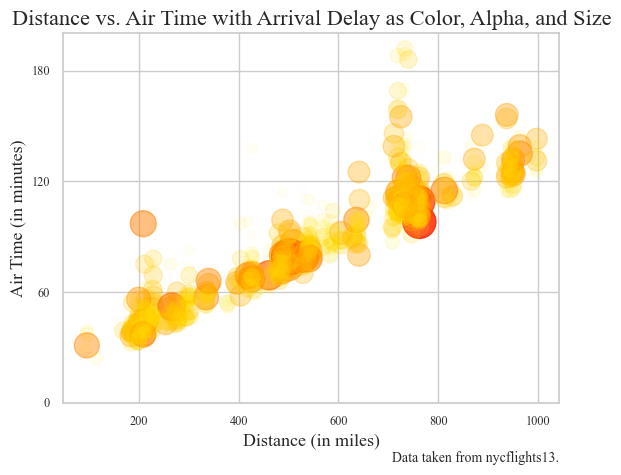

In [22]:
# Preparation:
#  Norming arrival delay --> values between 0 and 1
norm_delay = plt.Normalize(flights_sep3['arr_delay'].min(), flights_sep3['arr_delay'].max())

# create the scatterplot
plt.scatter(x=flights_sep3['distance'], y=flights_sep3['air_time'], 
            c = flights_sep3['arr_delay'],
            cmap = plt.get_cmap('autumn_r'),
            alpha=norm_delay(flights_sep3['arr_delay']),
            s=flights_sep3['arr_delay'].abs()  # Size of the points, scaled by absolute delay
            )

# Add labels and title
plt.xlabel('Distance (in miles)', fontsize = 13)
plt.ylabel('Air Time (in minutes)', fontsize = 13)
plt.title('Distance vs. Air Time with Arrival Delay as Color, Alpha, and Size', fontsize = 16)
plt.text(1, -0.15, 'Data taken from nycflights13.', ha='right', va='center', transform=plt.gca().transAxes, fontsize=10) # add text adn adjust the position
plt.yticks(ticks = np.arange(0, 210, 60)) # proceed from 0 to 210 in steps of 60 minutes, i.e. 1 hour


Alternatively, you can also adjust the inputs: divide arrival time in minutes by 60 to get arrival time in hours and adjust the labels accordingly.

Text(1, -0.15, 'Data taken from nycflights13.')

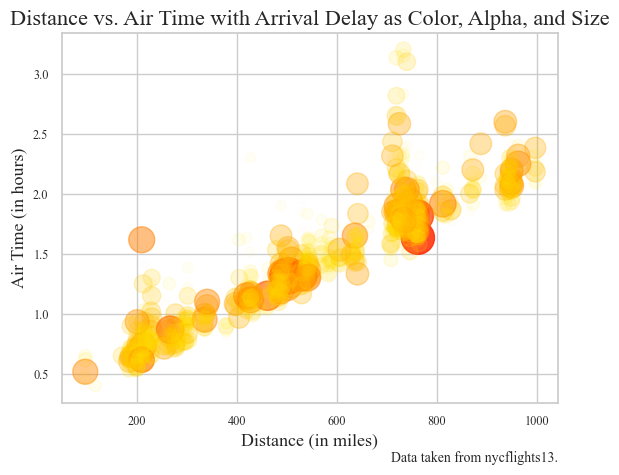

In [23]:
# Preparation:
#  Norming arrival delay --> values between 0 and 1
norm_delay = plt.Normalize(flights_sep3['arr_delay'].min(), flights_sep3['arr_delay'].max())

# create the scatterplot  (and adjust the units)
plt.scatter(x=flights_sep3['distance'], y=flights_sep3['air_time']/60, # adjust y to hours
            c = flights_sep3['arr_delay'],
            cmap = plt.get_cmap('autumn_r'),
            alpha=norm_delay(flights_sep3['arr_delay']),
            s=flights_sep3['arr_delay'].abs()  # Size of the points, scaled by absolute delay
            )

# Add labels and title
plt.xlabel('Distance (in miles)', fontsize = 13)
plt.ylabel('Air Time (in hours)', fontsize = 13)
plt.title('Distance vs. Air Time with Arrival Delay as Color, Alpha, and Size', fontsize = 16)
plt.text(1, -0.15, 'Data taken from nycflights13.', ha='right', va='center', transform=plt.gca().transAxes, fontsize=10) # add text adn adjust the position

Now, let us control the size of the plot and add a Legend. Adding the legend is a little more complicated.

([<matplotlib.axis.YTick at 0x12589cfd0>,
 [Text(0, 0, '0'),
  Text(0, 60, '60'),
  Text(0, 120, '120'),
  Text(0, 180, '180')])

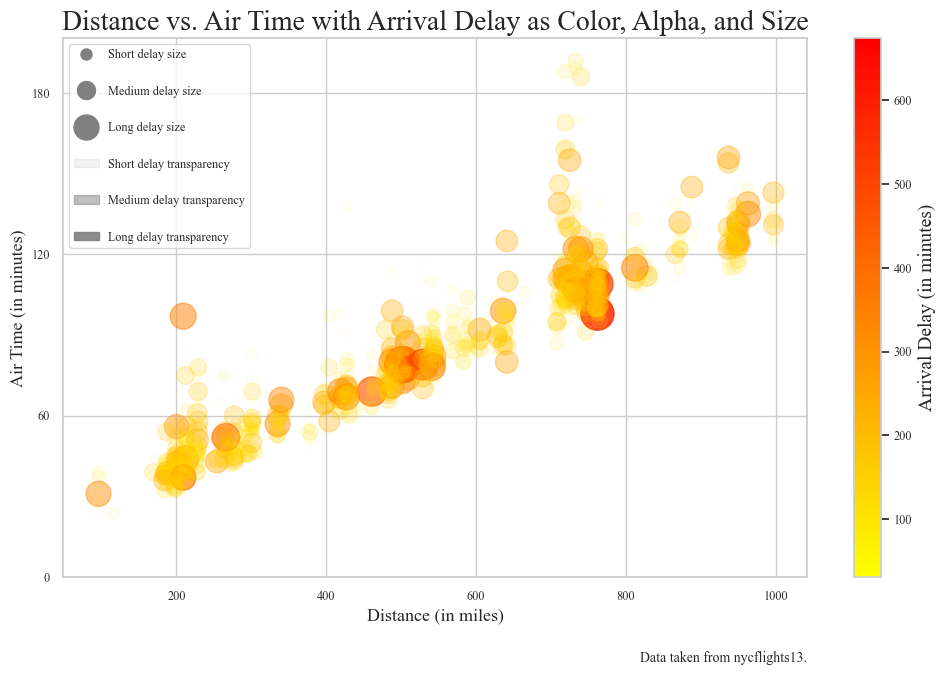

In [24]:
# Step 1: Preparation: 
## import additional functions for the legend objects
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

#  Norming arrival delay --> values between 0 and 1
norm_delay = plt.Normalize(flights_sep3['arr_delay'].min(), flights_sep3['arr_delay'].max())

# Step 2: Create a figure (you can control the size)
plt.figure(figsize=(12, 7))

# Step 3: create the scatterplot (and adjust the units)
scatter = plt.scatter(x=flights_sep3['distance'], y=flights_sep3['air_time'],  # adjust air time to hours
                      c = flights_sep3['arr_delay'], # adjust delay to hours
                      cmap = plt.get_cmap('autumn_r'),
                      alpha=norm_delay(flights_sep3['arr_delay']),
                      s=flights_sep3['arr_delay'].abs() 
                      )

# Step 4: Add the legends
## Add color bar to show the mapping for color
cbar = plt.colorbar(scatter)
cbar.set_label('Arrival Delay (in minutes)', fontsize = 14)

## Create size legend object
size_handles = [mlines.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Short delay size'),
                mlines.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=15, label='Medium delay size'),
                mlines.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=20, label='Long delay size')]

## Create alpha legend object
alpha_handles = [mpatches.Patch(color='gray', alpha=0.1, label='Short delay transparency'),
                 mpatches.Patch(color='gray', alpha=0.5, label='Medium delay transparency'),
                 mpatches.Patch(color='gray', alpha=0.9, label='Long delay transparency')]

## Add alpha and size legends to plot
plt.legend(handles=size_handles + alpha_handles, loc='upper left', labelspacing=2)

# Step 4: Add labels and title
plt.xlabel('Distance (in miles)', fontsize = 13)
plt.ylabel('Air Time (in minutes)', fontsize = 13)
plt.title('Distance vs. Air Time with Arrival Delay as Color, Alpha, and Size', fontsize = 20)
plt.text(1, -0.15, 'Data taken from nycflights13.', ha='right', va='center', transform=plt.gca().transAxes, fontsize=10) # add text adn adjust the position
plt.yticks(ticks = np.arange(0, 210, 60)) # proceed from 0 to 210 in steps of 60 minutes, i.e. 1 hour

### 3.2.2 Alternative: Seaborn

In Seaborn, getting a legend is easier, but we have fewer options that we can adjust and somewhat less control over the aesthetics.

Text(1, -0.15, 'Data taken from nycflights13.')

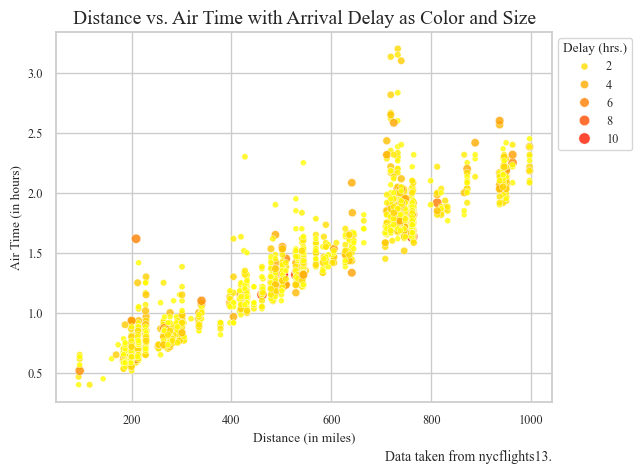

In [25]:
# Seaborn Scatterplot with 2 additional metric variables
# Step 1 create the scatterpt
sns.scatterplot(x = flights_sep3['distance'], 
                y = flights_sep3['air_time']/60, # divide air time by 60 to get hours
                hue = flights_sep3['arr_delay']/60, # color if assigned to metric variable
                size = flights_sep3['arr_delay']/60, # point size
                palette = 'autumn_r',  # color palette
                alpha = 0.8)  # alpha: cannot be assigned to metric variable
# Step 2 plot legends, title etc.
plt.legend(title = 'Delay (hrs.)', loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Distance (in miles)')
plt.ylabel('Air Time (in hours)')
plt.title('Distance vs. Air Time with Arrival Delay as Color and Size', fontsize = 14)
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

## 3.3 Add categorical variables (coded as strings)

To assign categorical variables to colors, in Matplotlib, we need to generate a color dictionary. In order to do this, we need to create a color dictionary. Categorical variables usually come as strings.

### 3.3.1 Using a color map

In [26]:
# Get unique categories
carriers = flights_sep3['carrier'].unique()
carriers

array(['B6', 'EV', 'MQ', 'DL', 'FL', 'US', 'WN', '9E', 'AA', 'UA', 'YV',
       'OO'], dtype=object)

Here we assign a number to each of the carriers (which is convenient) ...

In [27]:
# create a dictionary that assigns a number to each carrier
carrier_dict = {carrier: i for i, carrier in enumerate(carriers)}
carrier_dict

{'B6': 0,
 'EV': 1,
 'MQ': 2,
 'DL': 3,
 'FL': 4,
 'US': 5,
 'WN': 6,
 '9E': 7,
 'AA': 8,
 'UA': 9,
 'YV': 10,
 'OO': 11}

... and then have the number call a color from a preset color map.
The choice of the color map then determines the aesthetics of the plot.

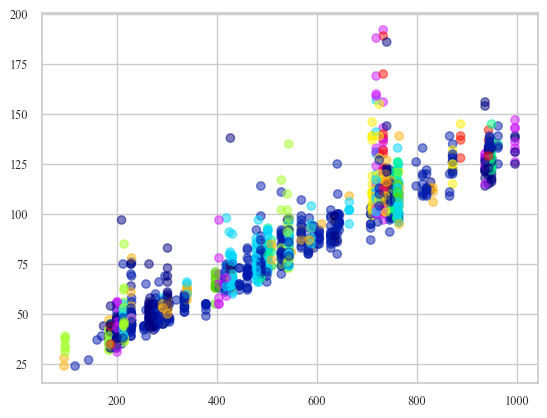

In [28]:
# Create the scatter plot
scatter = plt.scatter(
    x=flights_sep3['distance'], 
    y=flights_sep3['air_time'], 
    c=flights_sep3['carrier'].map(carrier_dict),   # Map the carrier column to the dictionary
    cmap=plt.get_cmap('gist_ncar'),  # get a color map with reasonable contrast
    alpha=0.5         
)

Make it presentable:

Text(1, -0.15, 'Data taken from nycflights13.')

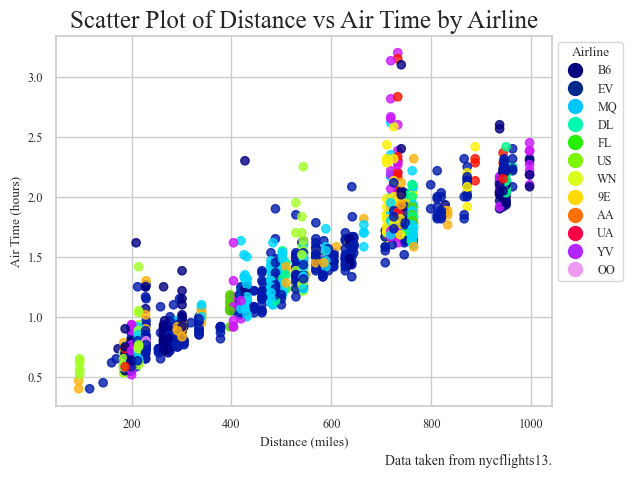

In [29]:
# Step 1: Preparation
carriers = flights_sep3['carrier'].unique()
carrier_dict = {carrier: i for i, carrier in enumerate(carriers)}

# Step 2: Create the scatter plot
scatter = plt.scatter(
    x=flights_sep3['distance'], 
    y=flights_sep3['air_time']/60, # adjust to hours
    c=flights_sep3['carrier'].map(carrier_dict),   # Map the carrier column to the dictionary
    cmap=plt.get_cmap('gist_ncar'),  # get a color map with reasonable contrast   
    alpha=0.8
)

# Step 3: Create a legend with color dictionary and color map
## create handles with the right number of colors
handles = [plt.Line2D([0], [0], marker='o', 
                      color=plt.get_cmap('gist_ncar')(i / len(carriers)), # select colors from the colormap
                      markersize=10, linestyle='') 
                      for i in range(len(carriers))]
plt.legend(handles, # plot the handels
           carriers, # fill in the carrier names
           title='Airline', # set the title
           loc='upper left', # locate it in the upper left ...
           bbox_to_anchor=(1, 1)) # ... outside the plot area

# Step 4: Add labels and title 
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (hours)')
plt.title('Scatter Plot of Distance vs Air Time by Airline', fontsize = 18)
# Add a caption using plt.text
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)


In Seaborn, we need no color dictionary and handling the legend is easier.

Text(1, -0.15, 'Data taken from nycflights13.')

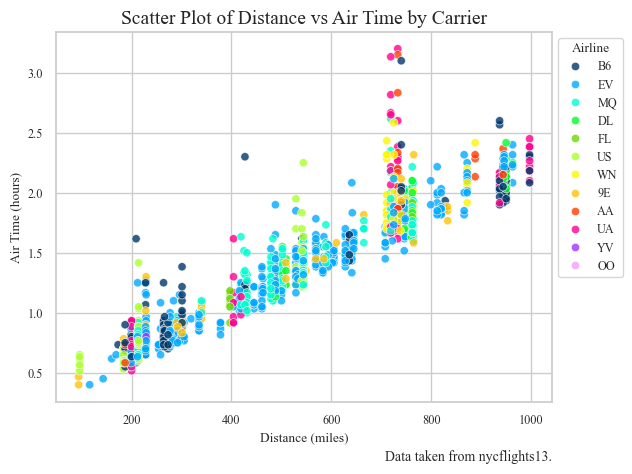

In [30]:
# Seaborn Scatterplot with 1 category
sns.scatterplot(x = flights_sep3['distance'], y = flights_sep3['air_time']/60, 
                hue = flights_sep3['carrier'],
                palette = 'gist_ncar', alpha = 0.8)
plt.legend(title = 'Airline', 
           loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (hours)')
plt.title('Scatter Plot of Distance vs Air Time by Carrier', fontsize = 14)
# Add a caption using plt.text
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

### 3.3.2 Assigning colors manually

Alternatively, we can manually assign a color to each category. This is less practical with many categories.

In [31]:
# Let's make a color dictionary for the airports
airport_dict = {
    'JFK': 'red',
    'LGA': 'yellow',
    'EWR': 'green'
}

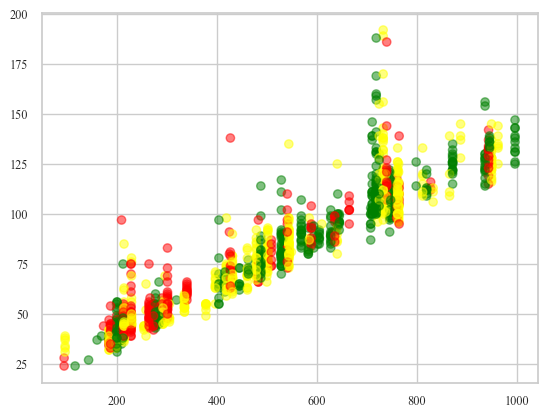

In [32]:
# Create the scatter plot
scatter = plt.scatter(
    x=flights_sep3['distance'], 
    y=flights_sep3['air_time'], 
    c=flights_sep3['origin'].map(airport_dict), 
    alpha=0.5         
)

Make it presentable ...

Text(1, -0.15, 'Data taken from nycflights13.')

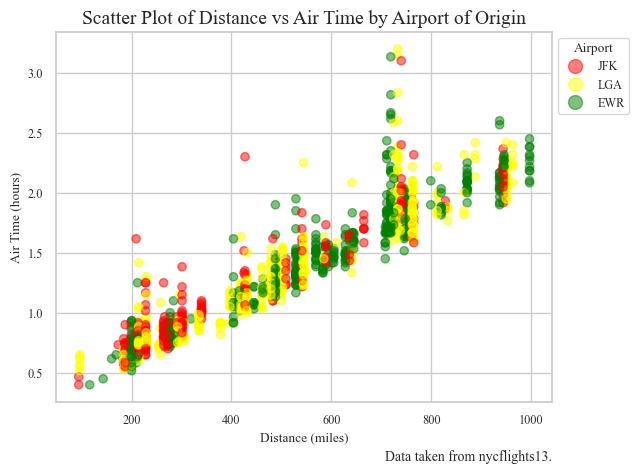

In [33]:
# Step 1: Preparation
airport_dict = {
    'JFK': 'red',
    'LGA': 'yellow',
    'EWR': 'green'
}
airports = list(airport_dict.keys())

# Step 2: Create the scatter plot
scatter = plt.scatter(
    x=flights_sep3['distance'], 
    y=flights_sep3['air_time']/60, 
    c=flights_sep3['origin'].map(airport_dict), 
    alpha=0.5         
)

# Step 3: Create and plot a legend with categories and color dictionary
## create the legend
handles = [plt.Line2D([0], [0], marker='o', 
                      color=airport_dict[airport],
                      markersize=10, linestyle='', alpha=0.5, label = airport) 
                      for airport in airports]
plt.legend(handles = handles, # plot the legend
           title='Airport', # add the title
           loc='upper left', bbox_to_anchor=(1, 1) # location, upper left and outside the plot
           )

# Step 4: Add labels and title
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (hours)')
plt.title('Scatter Plot of Distance vs Air Time by Airport of Origin', fontsize = 14)
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

In Seaborn, we can use a color dictionary instead of a color map.

Text(1, -0.15, 'Data taken from nycflights13.')

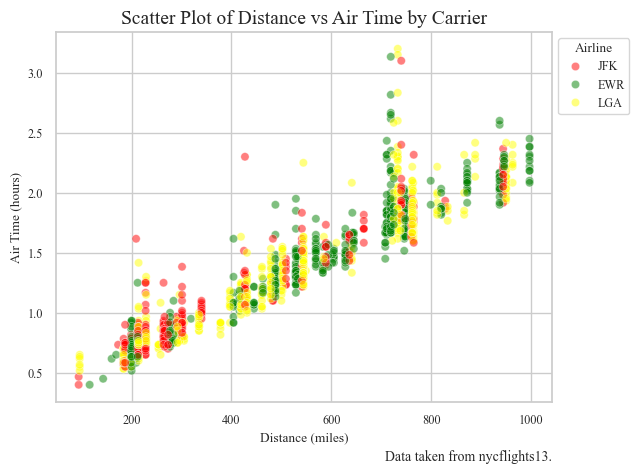

In [35]:
# Create the color dictionary
airport_dict = {
    'JFK': 'red',
    'LGA': 'yellow',
    'EWR': 'green'
}

# Seaborn Scatterplot with 1 category
sns.scatterplot(x = flights_sep3['distance'], y = flights_sep3['air_time']/60, 
                hue = flights_sep3['origin'],
                palette = airport_dict, alpha = 0.5)
plt.legend(title = 'Airline', 
           loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (hours)')
plt.title('Scatter Plot of Distance vs Air Time by Carrier', fontsize = 14)
# Add a caption using plt.text
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

### 3.3.3 Generic categories (like weekdays)

For generic categories like weekdays, we first adjust the inputs and then plot them as usual.  In order to get the weekdays, we first need to make sure that our time_hour variable has a proper date format. Then we extract the weekdays and save them as a variable. Finally, we create a color dictionary.

In [36]:
# First we need to format the variable as a date ...
flights_sep3['time_hour'] = pd.to_datetime(flights_sep3['time_hour'])

In [37]:
# .... then we extract the name of the day, ...
flights_sep3['weekday'] = flights_sep3['time_hour'].dt.day_name()

In [38]:
# ... and inspect the categories.
flights_sep3['weekday'].value_counts()

weekday
Monday       314
Thursday     287
Friday       246
Wednesday    170
Tuesday      169
Sunday       130
Saturday      83
Name: count, dtype: int64

In [39]:
# Then we make a dictionary for the weekdays and their assigned colors ...
weekdays_dict = {
    'Monday': 'purple',
    'Tuesday': 'blue',
    'Wednesday': 'yellow',
    'Thursday': 'orange',
    'Friday': 'red',
    'Saturday': 'green',
    'Sunday': 'blue'
}


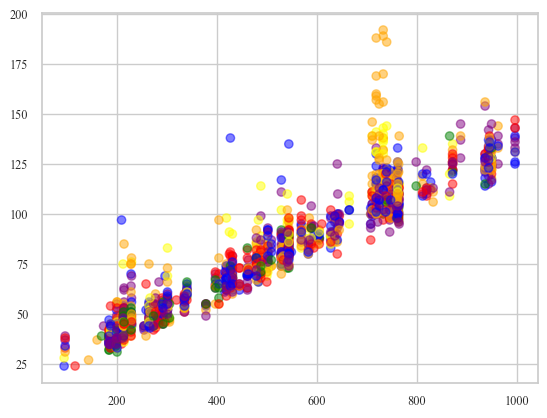

In [40]:
# ... create the scatter plot
plt.scatter(
    x=flights_sep3['distance'], 
    y=flights_sep3['air_time'], 
    c=flights_sep3['weekday'].map(weekdays_dict),
    alpha=0.5         
)

You can make it presentable the same way as above from here ...

Text(1, -0.15, 'Data taken from nycflights13.')

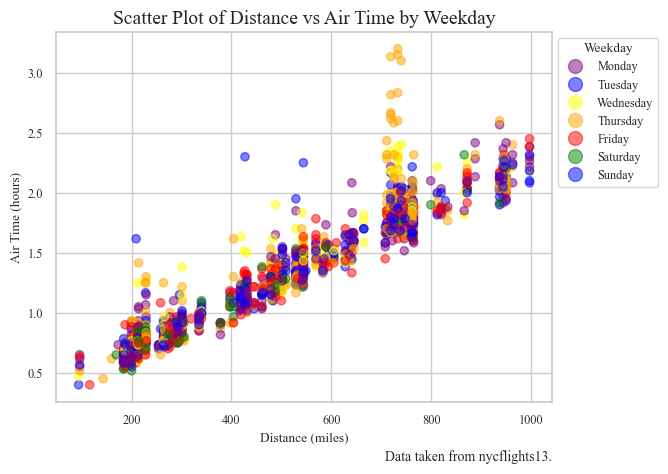

In [41]:
# Step 1: Preparation

# format time_hour as datetime
flights_sep3['time_hour'] = pd.to_datetime(flights_sep3['time_hour'])

# extract the weekdays
flights_sep3['weekday'] = flights_sep3['time_hour'].dt.day_name()

# make a color dictionary
weekdays_dict = {
    'Monday': 'purple',
    'Tuesday': 'blue',
    'Wednesday': 'yellow',
    'Thursday': 'orange',
    'Friday': 'red',
    'Saturday': 'green',
    'Sunday': 'blue'
}

# get list of weekdays to iterate over when creating the legend
weekdays = list(weekdays_dict.keys())


# Step 2: Create the scatter plot
plt.scatter(
    x=flights_sep3['distance'], 
    y=flights_sep3['air_time']/60, 
    c=flights_sep3['weekday'].map(weekdays_dict),
    alpha=0.5         
)

# Step 3: Create and plot a legend
## create the legend
handles = [plt.Line2D([0], [0], marker='o', 
                      color=weekdays_dict[weekday],
                      markersize=10, linestyle='', alpha=0.5, label = weekday) 
                      for weekday in weekdays]
plt.legend(handles = handles, # plot the legend
           title='Weekday', # add the title
           loc='upper left', bbox_to_anchor=(1, 1) # location, upper left and outside the plot
           )

# Step 4: Add labels and title
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (hours)')
plt.title('Scatter Plot of Distance vs Air Time by Weekday', fontsize = 14)
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)


Again, this is easier in Seaborn due to its handling of legends. Here, I directly extract the weekdays from the time_hour variable and assign them to colors in the color space.

([<matplotlib.axis.YTick at 0x126081c70>,
 [Text(0, 0, '0'),
  Text(0, 60, '60'),
  Text(0, 120, '120'),
  Text(0, 180, '180')])

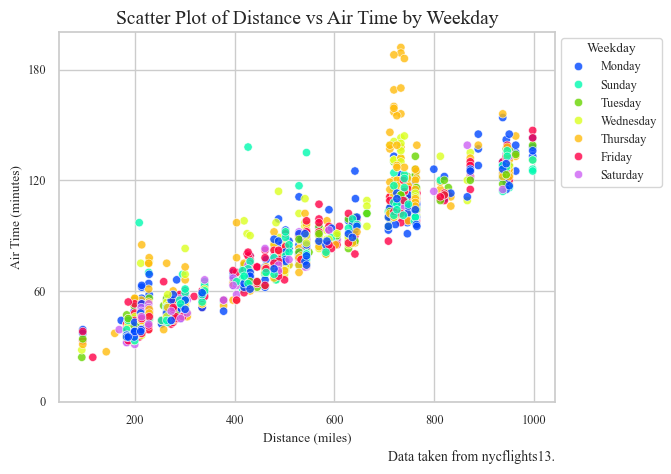

In [42]:
# Seaborn Scatterplot with 1 category
sns.scatterplot(x = flights_sep3['distance'], y = flights_sep3['air_time'], 
                hue = pd.to_datetime(flights_sep3['time_hour']).dt.day_name(), # here we directly get the weekdays from the data
                palette = 'gist_ncar', alpha = 0.8)
plt.legend(title = 'Weekday', 
           loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (minutes)')
plt.title('Scatter Plot of Distance vs Air Time by Weekday', fontsize = 14)
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)
plt.yticks(ticks = np.arange(0, 210, 60))

### 3.3.4 How about 2 categorical variables?

It is possible to plot 2 or more categorical variables in Matplotlib. For 2 categories, we can assign one category as above, and loop over the second category. For more categories, we would need nested loops over multiple categories.

Text(1, -0.15, 'Data taken from nycflights13.')

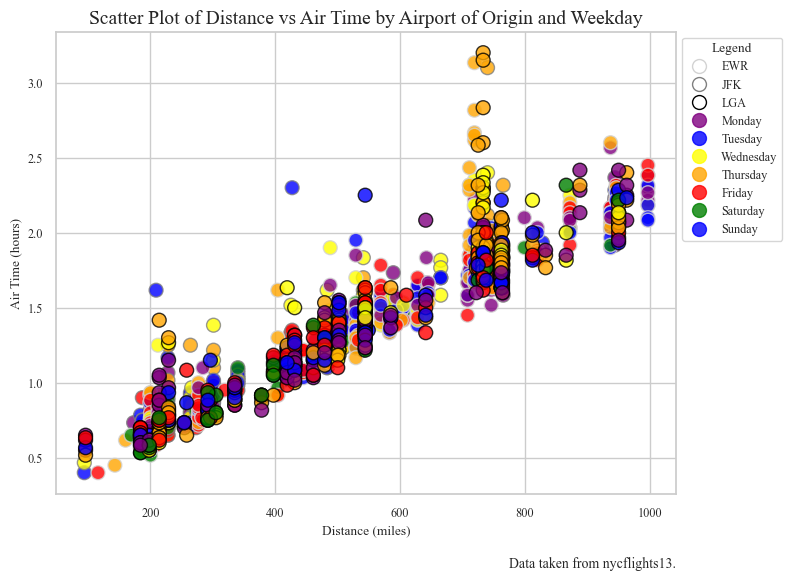

In [43]:
# Step 1: Preparation

# function for legend
import matplotlib.lines as mlines

# color dictionary 1
weekdays_dict = {
    'Monday': 'purple',
    'Tuesday': 'blue',
    'Wednesday': 'yellow',
    'Thursday': 'orange',
    'Friday': 'red',
    'Saturday': 'green',
    'Sunday': 'blue'
}

# color dictionary 2
origin_dict = {
    'EWR': 'lightgrey',
    'JFK': 'grey',
    'LGA': 'black'
}

# Step 2: Create the figure
plt.figure(figsize=(8, 6))  # Adjust figure size

# Step 3: create the scatter plot through a loop over origin
for origin in flights_sep3['origin'].unique():
    subset = flights_sep3[flights_sep3['origin'] == origin]
    
    # Scatter plot for each origin
    plt.scatter(
        x=subset['distance'], 
        y=subset['air_time']/60, 
        s=100,  # Point size
        color=subset['weekday'].map(weekdays_dict),  # Fill color based on weekday
        edgecolors=origin_dict[origin],  # Border color based on origin
        alpha=0.8,
        marker='o'  # Similar to shape=21 in ggplot2 (circle)
    )

# Step 4: Create the legend ...
weekday_handles = [plt.Line2D([0], [0], marker='o', color=weekdays_dict[weekday], 
                              markersize=10, linestyle='', alpha=0.8, label=weekday) 
                   for weekday in weekdays_dict]

origin_handles = [plt.Line2D([0], [0], marker='o', color='white', markeredgecolor=origin_dict[origin], 
                             markersize=10, linestyle='', label=origin) 
                  for origin in origin_dict]

handles = origin_handles + weekday_handles

# ... and plot it
plt.legend(
    handles=handles,
    title='Legend',
    loc='upper left',
    bbox_to_anchor=(1, 1)
)

# Step 5: Set labels and title
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (hours)')
plt.title('Scatter Plot of Distance vs Air Time by Airport of Origin and Weekday', fontsize = 14)
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

Making a plot with 2 categories is a lot easier in Seaborn, but we have fewer options for the design.

Text(1, -0.15, 'Data taken from nycflights13.')

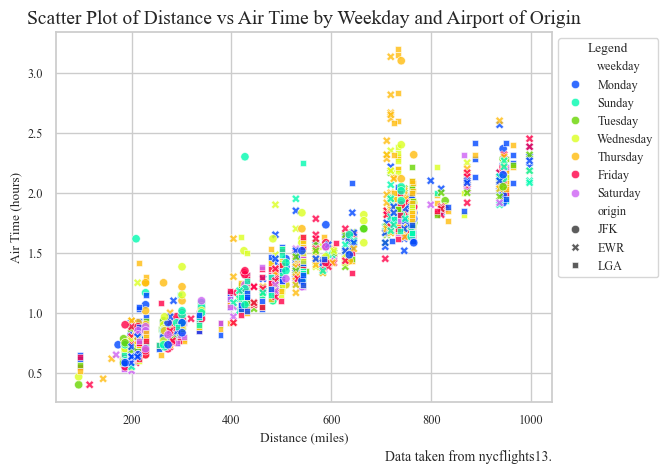

In [44]:
# Seaborn Scatterplot with 2 categories
sns.scatterplot(x = flights_sep3['distance'], y = flights_sep3['air_time']/60, 
                hue = flights_sep3['weekday'],
                style = flights_sep3['origin'],
                palette = 'gist_ncar', alpha = 0.8)
plt.legend(title = 'Legend', 
           loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (hours)')
plt.title('Scatter Plot of Distance vs Air Time by Weekday and Airport of Origin', fontsize = 14)
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

## 3.4 Add regression lines

Here we directly go to the presentable versions of the plots. In Matplotlib, we essentially calculate and plot a regression. Let's do that in 2 examples we went through above:

Text(1, -0.15, 'Data taken from nycflights13.')

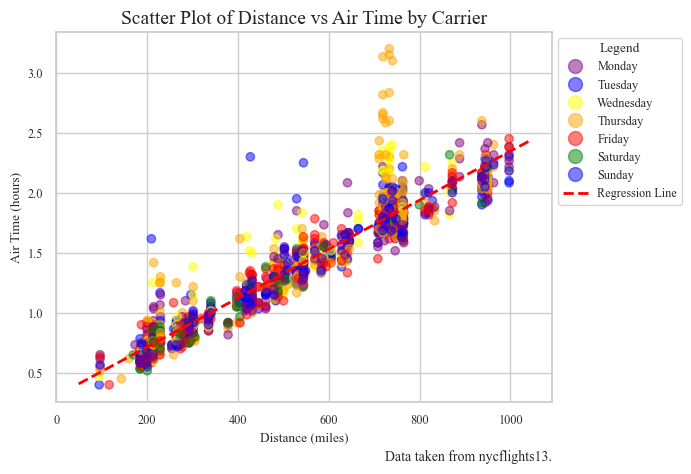

In [125]:
# Step 1: Preparation
weekdays_dict = {
    'Monday': 'purple',
    'Tuesday': 'blue',
    'Wednesday': 'yellow',
    'Thursday': 'orange',
    'Friday': 'red',
    'Saturday': 'green',
    'Sunday': 'blue'
}
weekdays = list(weekdays_dict.keys())

# Step 2: Create the scatter plot
plt.scatter(
    x=flights_sep3['distance'], 
    y=flights_sep3['air_time']/60, 
    c=flights_sep3['weekday'].map(weekdays_dict),
    #cmap=plt.get_cmap('gist_ncar'), 
    alpha=0.5         
)

# Calculate the linear regression line (slope and intercept)
slope, intercept = np.polyfit(flights_sep3['distance'], flights_sep3['air_time']/60, 1)

# Generate x values for the regression line
x_vals = np.array(plt.gca().get_xlim())  # Get current x-axis limits
y_vals = intercept + slope * x_vals  # Calculate corresponding y values

# Plot the linear regression line
plt.plot(x_vals, y_vals, color='red', linestyle='--', linewidth=2, label='Regression Line')



# Step 3: Create and plot a legend
## create the points 
weekday_handles = [plt.Line2D([0], [0], marker='o', 
                      color=weekdays_dict[weekday],
                      markersize=10, linestyle='', alpha=0.5, label = weekday) 
                      for weekday in weekdays]

## Combine the regression line handle with weekday handles
handles = weekday_handles + [plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, label='Regression Line')]

plt.legend(
    handles=handles,
    title='Legend',
    loc='upper left',
    bbox_to_anchor=(1, 1)
)

# Step 4: Add labels and title
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (hours)')
plt.title('Scatter Plot of Distance vs Air Time by Carrier', fontsize = 14)
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)


Text(1, -0.15, 'Data taken from nycflights13.')

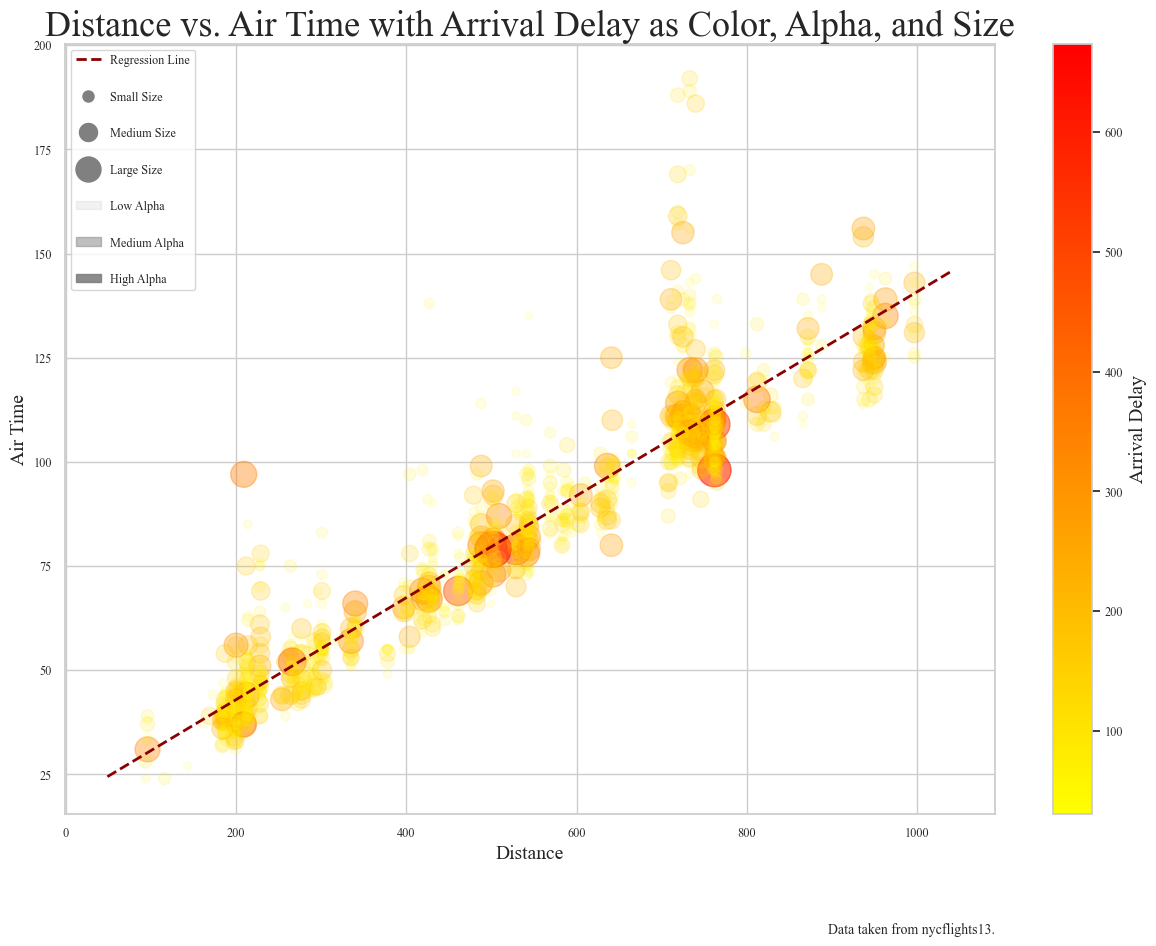

In [45]:
# A. Preparation: 
# additional functionalities
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
# normed version of arrival delay with values between 0 and 1
norm_delay = plt.Normalize(flights_sep2['arr_delay'].min(), flights_sep2['arr_delay'].max())

# B. Create a figure
plt.figure(figsize=(15, 10)) # define the sitze of the plot

# C. create the scatterplot
scatter = plt.scatter(x=flights_sep3['distance'], y=flights_sep3['air_time'], 
                      c = flights_sep3['arr_delay'],
                      cmap = plt.get_cmap('autumn_r'),
                      alpha=flights_sep3['arr_delay'].apply(lambda x: norm_delay(x)),
                      s=flights_sep3['arr_delay'].abs() 
                      )


# Calculate the linear regression line (slope and intercept)
slope, intercept = np.polyfit(flights_sep3['distance'], flights_sep3['air_time'], 1)

# Generate x values for the regression line
x_vals = np.array(plt.gca().get_xlim())  # Get current x-axis limits
y_vals = intercept + slope * x_vals  # Calculate corresponding y values

# Plot the linear regression line
plt.plot(x_vals, y_vals, color='darkred', linestyle='--', linewidth=2, label='Regression Line')



# D. Add the legends
## Add color bar to show the mapping for color
cbar = plt.colorbar(scatter)
cbar.set_label('Arrival Delay', fontsize = 14)

## Create size legend
size_handles = [mlines.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Small Size'),
                mlines.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=15, label='Medium Size'),
                mlines.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=20, label='Large Size')]

## Create alpha legend
alpha_handles = [mpatches.Patch(color='gray', alpha=0.1, label='Low Alpha'),
                 mpatches.Patch(color='gray', alpha=0.5, label='Medium Alpha'),
                 mpatches.Patch(color='gray', alpha=0.9, label='High Alpha')]

## Add legends to plot
plt.legend(
    handles= [plt.Line2D([0], [0], color='darkred', linestyle='--', linewidth=2, label='Regression Line')]
                + size_handles + alpha_handles, loc='upper left',
    labelspacing=2
    )

# E. Add labels and title
plt.xlabel('Distance', fontsize = 14)
plt.ylabel('Air Time', fontsize = 14)
plt.title('Distance vs. Air Time with Arrival Delay as Color, Alpha, and Size', fontsize = 26)
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

Seaborn has a special function for regression plots:

<Axes: xlabel='distance', ylabel='air_time'>

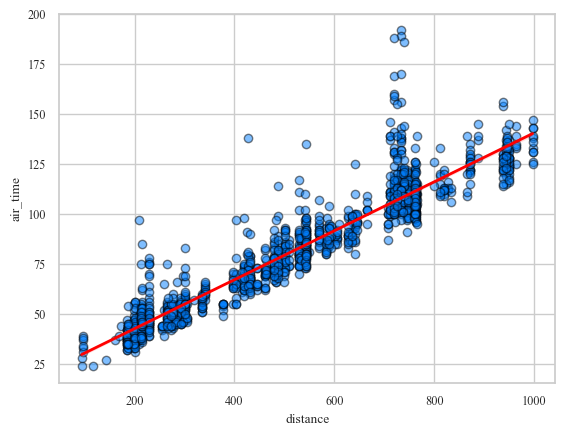

In [46]:
sns.regplot(x=flights_sep3['distance'], y=flights_sep3['air_time'], 
            scatter = True, # creates a scatter plot in the background
            scatter_kws={'alpha':0.5, 'edgecolor':'black'},  # Customize scatter points
            line_kws={'color':'red', 'lw':2},  # Customize the regression line
            )

However, if we want more aesthetic control, we should plot a regression line and a separate scatterplot:

Text(1, -0.15, 'Data taken from nycflights13.')

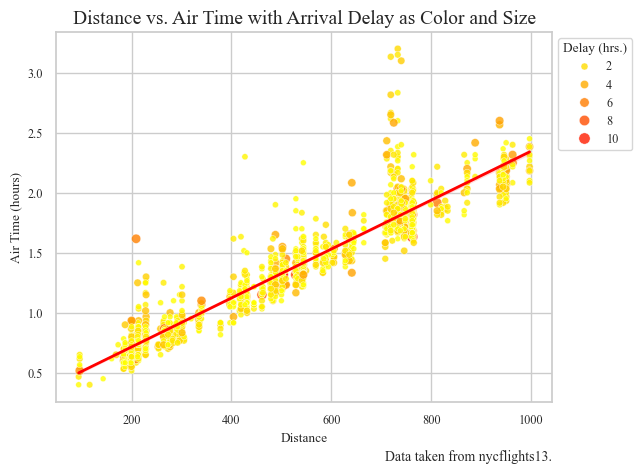

In [47]:
# Step 1 create the scatterpt
sns.scatterplot(x = flights_sep3['distance'], y = flights_sep3['air_time']/60, 
                hue = flights_sep3['arr_delay']/60,
                size = flights_sep3['arr_delay']/60,
                palette = 'autumn_r', 
                alpha = 0.8) 

# Step 2: Create a regression line on top of the scatter plot
sns.regplot(x=flights_sep3['distance'], y=flights_sep3['air_time']/60, 
            scatter=False,  # Disable scatter points in the regression plot
            color='red',  # Set the color for the regression line
            line_kws={'linewidth': 2})  # Customize the regression line

# Step 2 plot legends, title etc.
plt.legend(title = 'Delay (hrs.)', 
           loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Distance')
plt.ylabel('Air Time (hours)')
plt.title('Distance vs. Air Time with Arrival Delay as Color and Size', fontsize = 14)
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

## 3.4 Seaborn Special Options

There are some special options in Seaborn that are not available in Matplotlib.

### 3.4.1 Joint Plots

One of them is the Joint Plot, a combination of histograms and scatter plots:

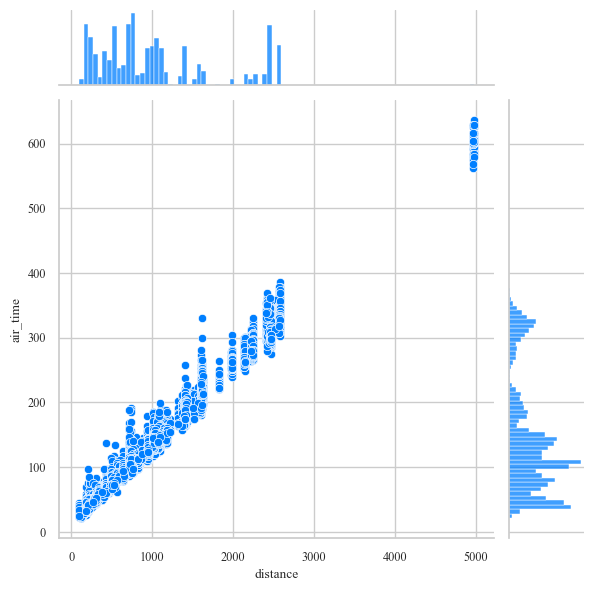

In [48]:
# barebones joint plot
sns.jointplot(x = flights_sep['distance'], y = flights_sep['air_time'])

You have some options to customize this by visualizing a categorical variable:
but that changes the plot quite a bit.

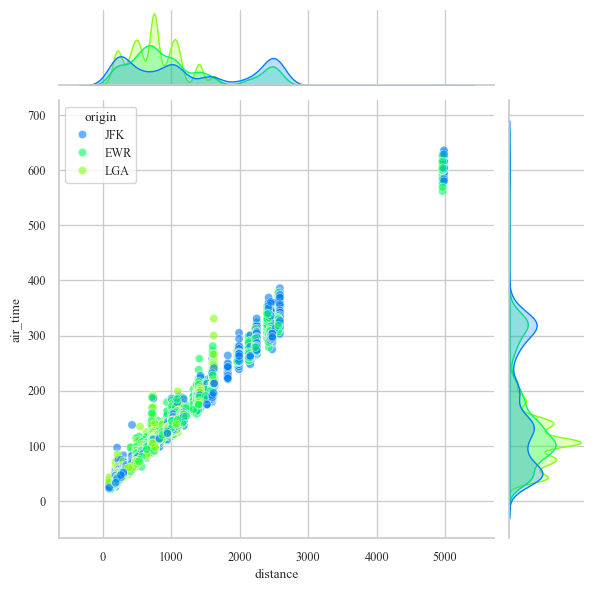

In [241]:
# Joint Plot with categorical variable
sns.jointplot(x = flights_sep['distance'], 
              y = flights_sep['air_time'], 
              alpha = 0.6,
              hue=flights_sep['origin']) # histograms are replaced by density plots; good for low number of categories
              

Make it presentable:

Text(1, -0.15, 'Data taken from nycflights13.')

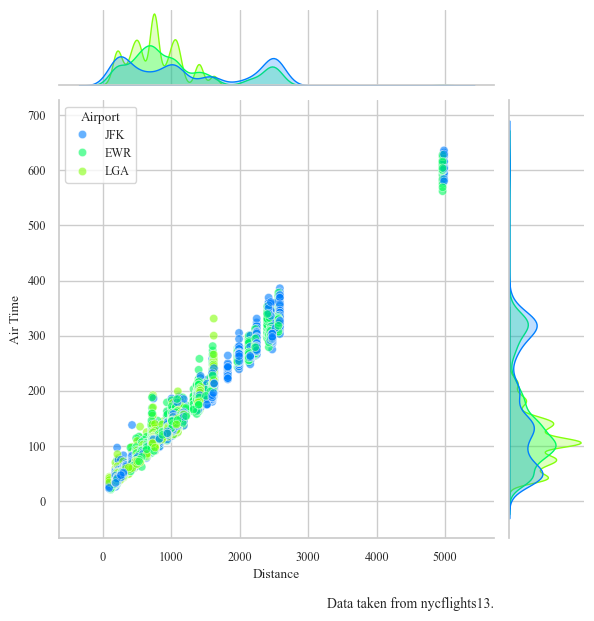

In [49]:
# Joint Plot with categorical variable
sns.jointplot(x = flights_sep['distance'], 
              y = flights_sep['air_time'], 
              alpha = 0.6,
              hue=flights_sep['origin']) # histograms are replaced by density plots; good for low number of categories

# Step 2 plot labels
plt.xlabel('Distance')
plt.ylabel('Air Time')
plt.legend(title = 'Airport')
plt.text(1, -0.15, 'Data taken from nycflights13.',ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

### 3.4.2 Multiple plots

You can also join multiple plots together to represent catagorical variables.

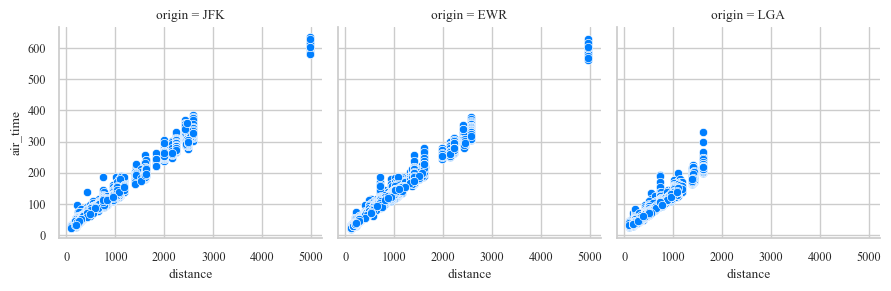

In [50]:
grid = sns.FacetGrid(flights_sep, col='origin', margin_titles=True)
grid.map(sns.scatterplot, 'distance', 'air_time')

Make it presentable:

([<matplotlib.axis.YTick at 0x1288c1580>,
 [])

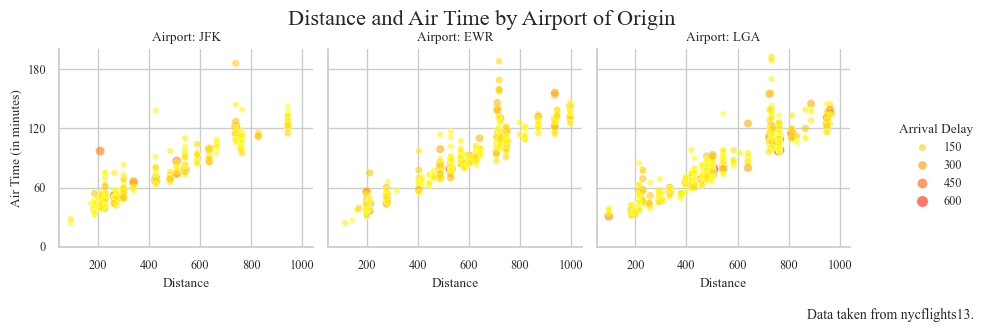

In [51]:
# Create a FacetGrid
grid = sns.FacetGrid(flights_sep3, col='origin', margin_titles=True)
# Map a scatterplot with the 'arr_delay' as the color
grid.map(sns.scatterplot, 'distance', 'air_time', 
         hue=flights_sep3['arr_delay'], 
         palette = 'autumn_r', 
         size = flights_sep3['arr_delay'],
         alpha = 0.6)

# Add a color bar
grid.add_legend(title = "Arrival Delay")

# Labels and titles
grid.set_axis_labels('Distance', 'Air Time (in minutes)')
plt.subplots_adjust(top=0.85)  # Adjust the top space for the title
grid.figure.suptitle('Distance and Air Time by Airport of Origin', fontsize=16)
grid.set_titles(col_template="Airport: {col_name}")
grid.figure.text(1, -0.05, 'Data taken from nycflights13.', ha='right', fontsize=10)
plt.yticks(ticks = np.arange(0, 210, 60)) # proceed from 0 to 210 in steps of 60 minutes, i.e. 1 hour


You can also map two categorical variables:

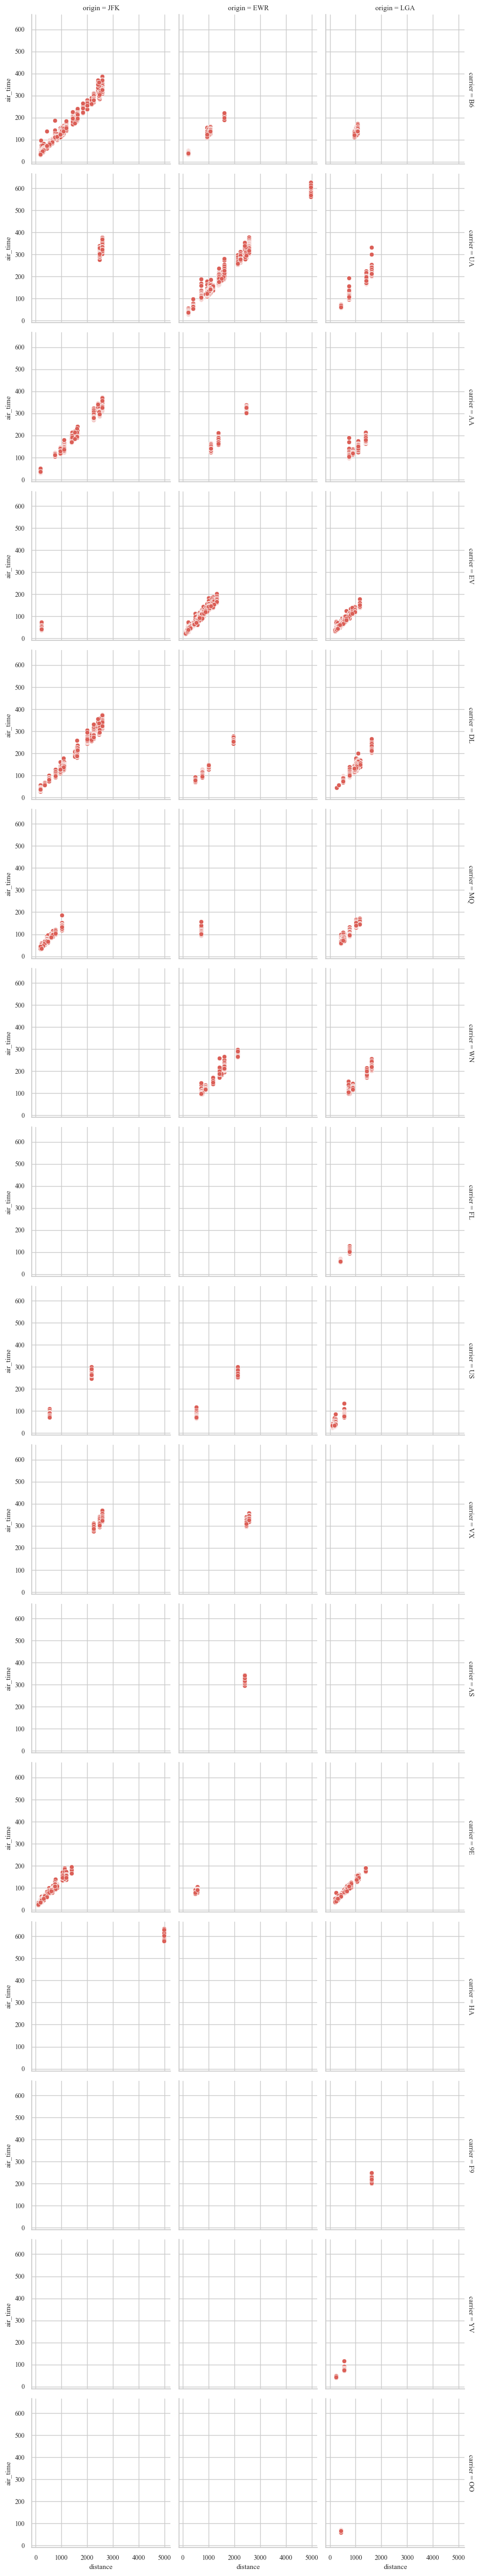

In [92]:
grid = sns.FacetGrid(flights_sep, col='origin', row='carrier', margin_titles=True)
grid.map(sns.scatterplot, 'distance', 'air_time')

Make it presentable:

([<matplotlib.axis.YTick at 0x13b3e03d0>,
 [])

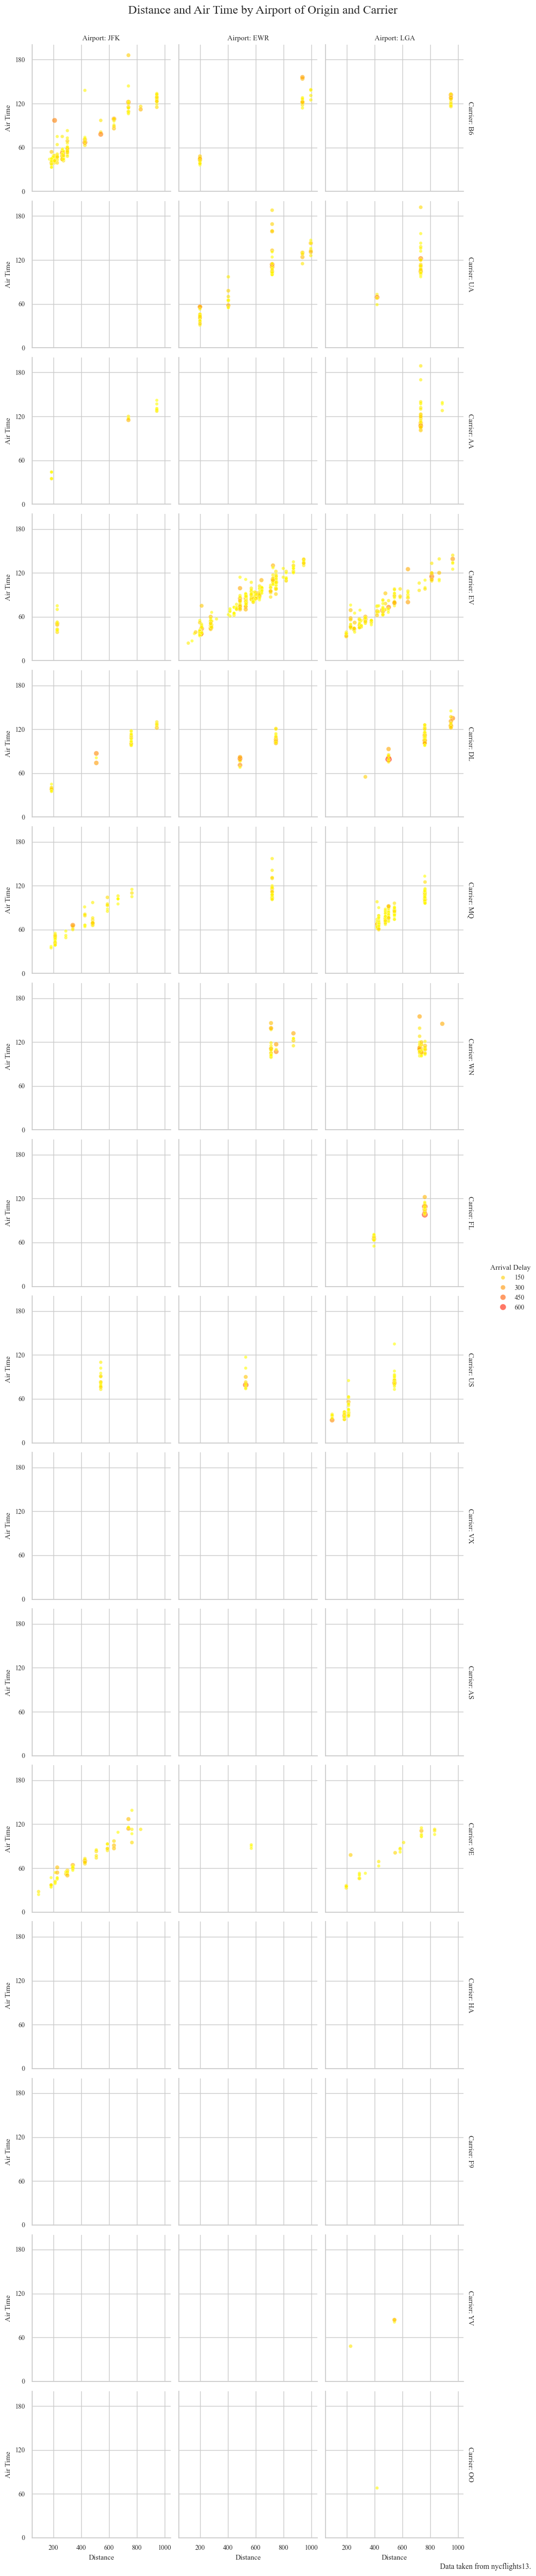

In [245]:
# Create a FacetGrid
grid = sns.FacetGrid(flights_sep, col='origin', row='carrier', margin_titles=True)

# Map a scatterplot with the 'arr_delay' as the color
grid.map(sns.scatterplot, 'distance', 'air_time', 
         hue=flights_sep3['arr_delay'], 
         palette = 'autumn_r', 
         size = flights_sep3['arr_delay'],
         alpha = 0.6)

# Add a color bar
grid.add_legend(title = "Arrival Delay")

# Labels and titles
grid.set_axis_labels('Distance', 'Air Time')
plt.subplots_adjust(top=0.965)  # Adjust the top space for the title
grid.figure.suptitle('Distance and Air Time by Airport of Origin and Carrier', fontsize=16)
grid.set_titles(col_template="Airport: {col_name}", row_template="Carrier: {row_name}")
grid.figure.text(1, 0, 'Data taken from nycflights13.', ha='right', fontsize=10) 
plt.yticks(ticks = np.arange(0, 210, 60)) # proceed from 0 to 210 in steps of 60 minutes, i.e. 1 hour

# 4. Bar and Column plots (focus on Pandas)

According to some statisticians, 60% to 80% of interesting variables in political science and sociology are categorical in nature. A lot of the time, we use bar and column plots for these variables, which do not have the same level of complexity as scatter plots.

There are multiple options in Python, but we will focus on the plotting options provided by Pandas due to their seamless integration with the frequency tables and pivot tables in Pandas. That means we proceed in 2 steps:
1. Prepare tables with the information we want (which sometimes work even better to make a point than plots)
2. Use Pandas plot functins to plot these tables.

Of course, Seaborn is an alternative.

## 4.1 Plotting 1 categorical variable

Let's make a bare-bones column plot: create a table the the flight counts by airport of origin and then plot it.

The table can be created with value_counts():

In [52]:
flights_sep['origin'].value_counts()

origin
EWR    9550
LGA    9116
JFK    8908
Name: count, dtype: int64

Then we use plot.bar() to make a bare-bones column plot:

<Axes: xlabel='origin'>

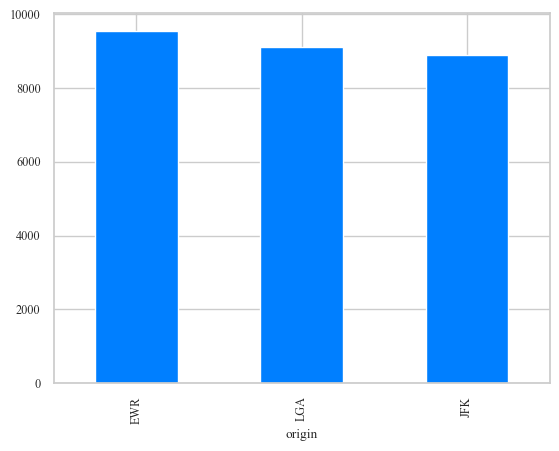

In [14]:
flights_sep['origin'].value_counts().plot.bar()

<Axes: xlabel='origin'>

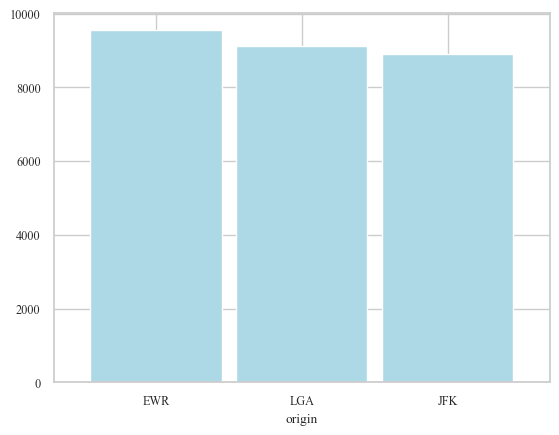

In [15]:
# let's make some adjustments to this
flights_sep['origin'].value_counts().plot.bar(rot = 0, # rot: prevents rotation of the labels 
                                              width = 0.9, # width of the columns
                                              color = "lightblue") # color of the columns


Let's make it presentable:

Text(1, -0.15, 'Data taken from nycflights13.')

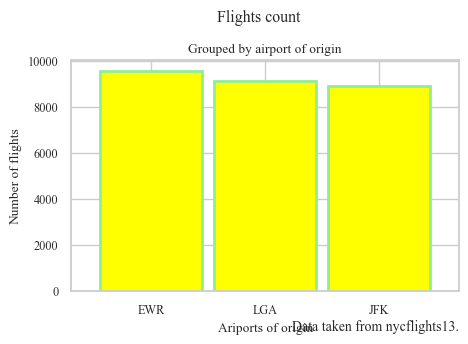

In [16]:
plt.figure(figsize=(5,3)) # Define the size of the plot

flights_sep['origin'].value_counts().plot.bar(rot = 0, # rot: prevents rotation of the labels 
                                              width = 0.9, # width of the columns
                                              color = "yellow", # color of the columns
                                              edgecolor = "lightgreen", linewidth = 2)
plt.suptitle('Flights count', y = 1.05) # y adjusts the position of the suptitle; try commenting it out
plt.title('Grouped by airport of origin') 
plt.xlabel('Ariports of origin')
plt.ylabel('Number of flights')
plt.text(1, -0.15, 'Data taken from nycflights13.',ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

If there are many categories, it may be better to flip the graph.

<Axes: ylabel='carrier'>

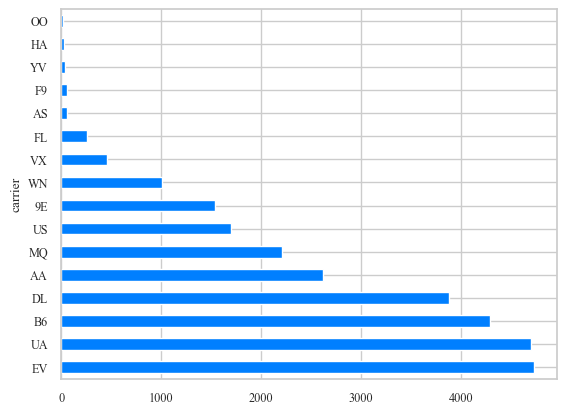

In [58]:
flights_sep['carrier'].value_counts().plot.barh()

Make it presentable:

Text(1, -0.15, 'Data taken from nycflights13.')

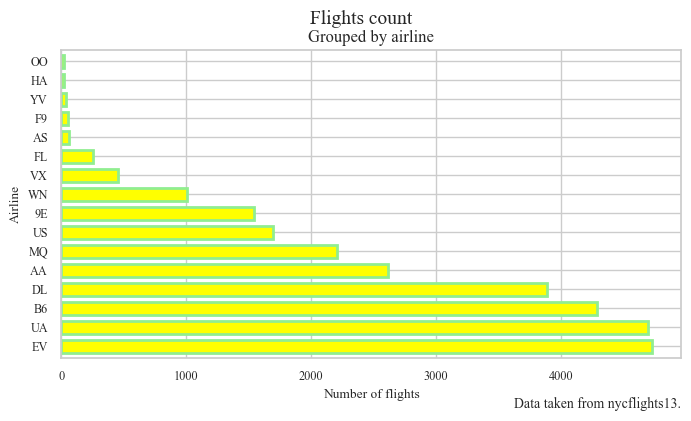

In [17]:
plt.figure(figsize=(8,4)) # Define the size of the plot

# create the plot
flights_sep['carrier'].value_counts().plot.barh(rot = 0, # rot: prevents rotation of the labels 
                                              width = 0.7, # width of the columns
                                              color = "yellow", # color of the columns
                                              edgecolor = "lightgreen", linewidth = 2)
# add titles, labels etc.
plt.suptitle('Flights count' , fontsize = 14)
plt.title('Grouped by airline', fontsize = 12) 
plt.ylabel('Airline')
plt.xlabel('Number of flights')
plt.text(1, -0.15, 'Data taken from nycflights13.', ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)


By the way: With Python you may often work in a regular codefile, rather than a Jupyter notebook.
The codefile does not offer a GUI where you can save the plot.
So, you can save it in a working directory
Save the plot in the working directory for later use (optional).
Not all plotting functions produce the same kind of objects, so we use a slightly more complex approach here that will work for all plotting functions.

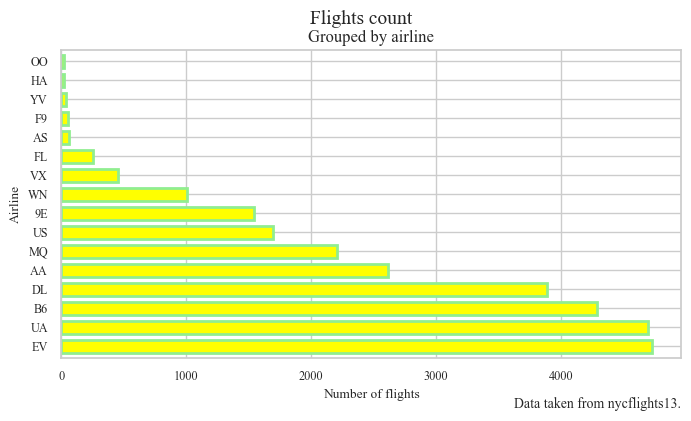

In [18]:
# module for interaction with OS
import os 
# define working directory
os.chdir('/Users/arminmuller/Documents/DST_Python/plots') 

# create a new figure
plt.figure(figsize=(8, 4))

# create a sub-plot named ax
flights_sep['carrier'].value_counts().plot.barh(rot = 0, # rot: prevents rotation of the labels 
                                              width = 0.7, # width of the columns
                                              color = "yellow", # color of the columns
                                              edgecolor = "lightgreen", linewidth = 2)

# set the title and labels
plt.suptitle('Flights count' , fontsize = 14)
plt.title('Grouped by airline', fontsize = 12) 
plt.ylabel('Airline')
plt.xlabel('Number of flights')
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

# save the plot to the working directory 
plt.savefig('Plot_saved.png')


## 4.2 Plotting 2 categorical variables

Here, using Pandas routines for hierarchical indexes provides a practical approach to integrating an additional categorical variable. Let's try to visualize both carriers and airport of origin.

First, we group the carrier observation by the origin categories:

In [19]:
# Count occurrences of each unique value in 'carrier'
carrier_counts = flights_sep['carrier'].groupby(flights_sep['origin']).value_counts()
carrier_counts

origin  carrier
EWR     UA         3573
        EV         3425
        WN          506
        B6          478
        DL          423
        US          341
        AA          282
        MQ          214
        VX          161
        9E           87
        AS           60
JFK     B6         3340
        DL         1770
        AA         1055
        9E         1036
        MQ          630
        UA          389
        VX          292
        US          251
        EV          120
        HA           25
LGA     DL         1690
        MQ         1362
        AA         1277
        EV         1180
        US         1106
        UA          732
        WN          504
        B6          473
        9E          417
        FL          255
        F9           58
        YV           42
        OO           20
Name: count, dtype: int64

Then, we use unstack() and transpose() to turn this from a hierarchical index into a frequency table.

In [20]:
# Transform the table
barplot_dta = carrier_counts.unstack().transpose()
barplot_dta

origin      EWR     JFK     LGA
carrier                        
9E         87.0  1036.0   417.0
AA        282.0  1055.0  1277.0
AS         60.0     NaN     NaN
B6        478.0  3340.0   473.0
DL        423.0  1770.0  1690.0
EV       3425.0   120.0  1180.0
F9          NaN     NaN    58.0
FL          NaN     NaN   255.0
HA          NaN    25.0     NaN
MQ        214.0   630.0  1362.0
OO          NaN     NaN    20.0
UA       3573.0   389.0   732.0
US        341.0   251.0  1106.0
VX        161.0   292.0     NaN
WN        506.0     NaN   504.0
YV          NaN     NaN    42.0

Then we simply plot the table:

<Axes: ylabel='carrier'>

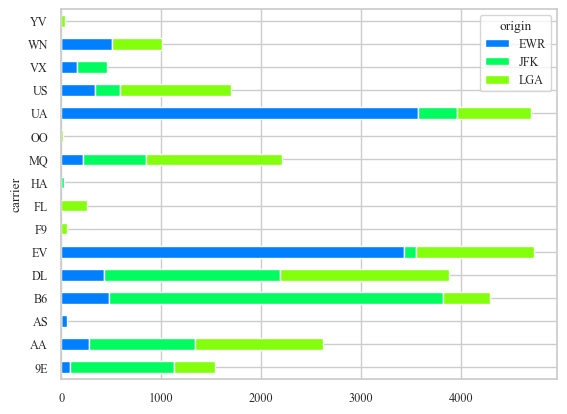

In [21]:
# And plot it in a stacked barplot
barplot_dta.plot.barh(stacked = True)

We can also do these steps in just one line of code:

<Axes: ylabel='carrier'>

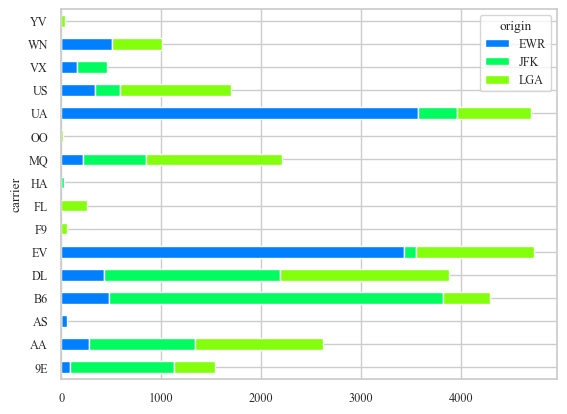

In [22]:
# integrated version ersion: 
flights_sep['carrier'].groupby(flights_sep['origin']).value_counts().unstack().transpose().plot.barh(stacked = True)

Let's make it presentable:

Text(1, -0.15, 'Data taken from nycflights13.')

<Figure size 800x500 with 0 Axes>

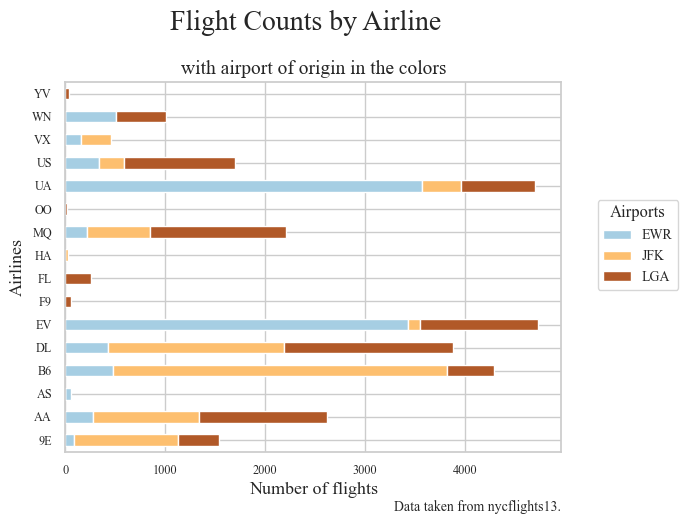

In [9]:
plt.figure(figsize=(8, 5))
plot_data = flights_sep['carrier'].groupby(flights_sep['origin']).value_counts().unstack().transpose()
plot_data.plot.barh(stacked = True, colormap = 'Paired')
plt.suptitle('Flight Counts by Airline', fontsize = 20, y = 1.03)
plt.title('with airport of origin in the colors', fontsize = 14)
plt.xlabel('Number of flights', fontsize = 13)
plt.ylabel('Airlines', fontsize = 13)
plt.legend(title='Airports', # there are various options for the legend
          loc = 'upper right', # location
          bbox_to_anchor=(1.25, 0.7),
          title_fontsize = 12, 
          fontsize = 10
          )
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

You can, in principal, display the number of flights within the visualization. However, this is technically more complex because you have to save the plot as an object and loop over the bars. The result is not necessarily satisfactory, because some numbers may be overlapping, zeros may be displayed where there are no observations for one category and so on.

**Recommendation: If you really need the numbers, just go for a frequency table (either standalone, or alongside a plot).**

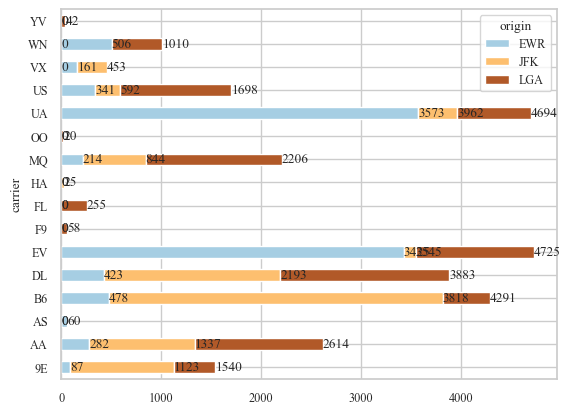

In [10]:

# Create the stacked bar plot and save it as an object
ax = flights_sep['carrier'].groupby(flights_sep['origin']).value_counts().unstack().transpose().plot.barh(
    stacked=True,
    colormap='Paired')

# Loop over the bars to add text annotations
for bars in ax.containers:
    ax.bar_label(bars, 
                 label_type='edge')  # Display labels: "center" = inside the bars; "edge" = on the edge
plt.show()

If we want a barplot representing percentages, we prepare the table accordingly:

In [66]:
# calculate the line sums, i.e. the sum of flights for every airline
barplot_dta.sum(axis=1) # axis=1 for the line sums

carrier
9E    1540.0
AA    2614.0
AS      60.0
B6    4291.0
DL    3883.0
EV    4725.0
F9      58.0
FL     255.0
HA      25.0
MQ    2206.0
OO      20.0
UA    4694.0
US    1698.0
VX     453.0
WN    1010.0
YV      42.0
dtype: float64

In [256]:
# divide values by line sums to get line percentages
barplot_dta.div(barplot_dta.sum(axis=1), axis=0)

origin        EWR       JFK       LGA
carrier                              
9E       0.056494  0.672727  0.270779
AA       0.107881  0.403596  0.488523
AS       1.000000       NaN       NaN
B6       0.111396  0.778373  0.110231
DL       0.108936  0.455833  0.435230
EV       0.724868  0.025397  0.249735
F9            NaN       NaN  1.000000
FL            NaN       NaN  1.000000
HA            NaN  1.000000       NaN
MQ       0.097008  0.285585  0.617407
OO            NaN       NaN  1.000000
UA       0.761184  0.082872  0.155944
US       0.200824  0.147821  0.651355
VX       0.355408  0.644592       NaN
WN       0.500990       NaN  0.499010
YV            NaN       NaN  1.000000

Turn it into a plot:

<Axes: ylabel='carrier'>

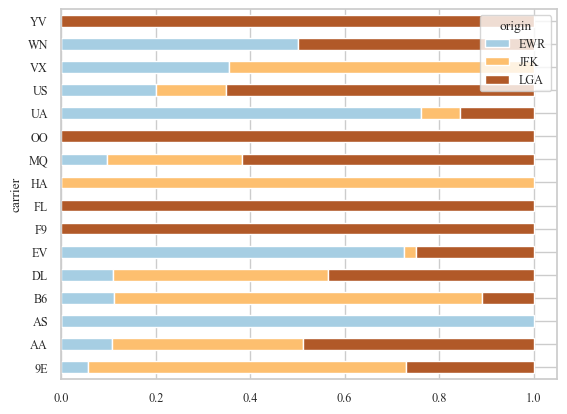

In [77]:
barplot_dta.div(barplot_dta.sum(axis=1), axis=0).plot.barh(stacked = True, colormap = 'Paired')

Let's make it presentable ...

Text(1, -0.15, 'Data taken from nycflights13.')

<Figure size 800x500 with 0 Axes>

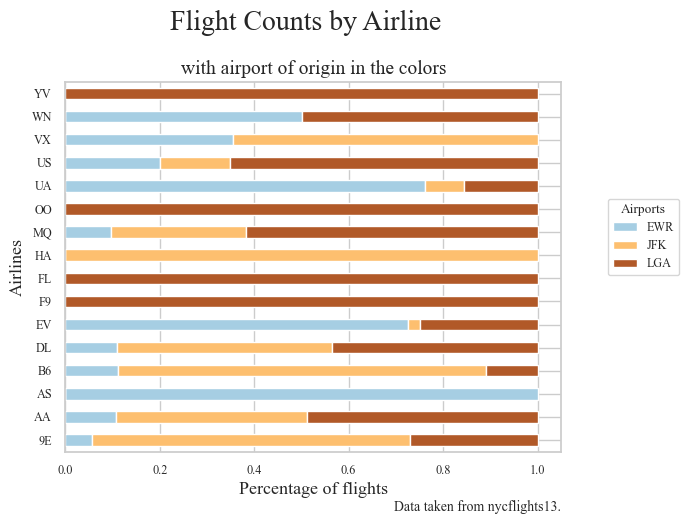

In [78]:
# make it presentable
plt.figure(figsize=(8, 5))
barplot_dta.div(barplot_dta.sum(axis=1), axis=0).plot.barh(stacked = True, colormap = 'Paired')
plt.suptitle('Flight Counts by Airline', fontsize = 20, y = 1.03)
plt.title('with airport of origin in the colors', fontsize = 14)
plt.xlabel('Percentage of flights', fontsize = 13)
plt.ylabel('Airlines', fontsize = 13)
plt.legend(title='Airports', # there are various options for the legend
          bbox_to_anchor=(1.25, 0.7)),  # Move it outside the plot
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

... and explore the various options for the legend:

In [1]:
# make it presentable & improve the legend
plt.figure(figsize=(8, 5))
barplot_dta.div(barplot_dta.sum(axis=1), axis=0).plot.barh(stacked = True, colormap = 'Paired')
plt.suptitle('Flight Counts by Airline', fontsize = 20, y = 1.03)
plt.title('with airport of origin in the colors', fontsize = 14)
plt.xlabel('Percentage of flights', fontsize = 13)
plt.ylabel('Airlines', fontsize = 13)
plt.legend(title='Airports', # there are various options for the legend
          loc = 'center right', # location
          bbox_to_anchor=(1.25, 0.5),  # Move it outside the plot
          title_fontsize = 12, 
          fontsize = 10,
          ncol = 1, # all info in 1 column
          # Frame configuration
          frameon = True, # Box around the info
          borderpad = 1, # size of the box
          fancybox = True, # rounded box yes or no
          shadow = True, # does the frame case a shadow? interacts with transparency
          framealpha = 0.8 # frame transparency
          )
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

NameError: name 'plt' is not defined

## 4.3 Plotting categorical variables with Seaborn

We can create such visualizations directly from the data with Seaborn as well. 

This is very straightforward for a simple countplot:

Text(1, -0.15, 'Data taken from nycflights13.')

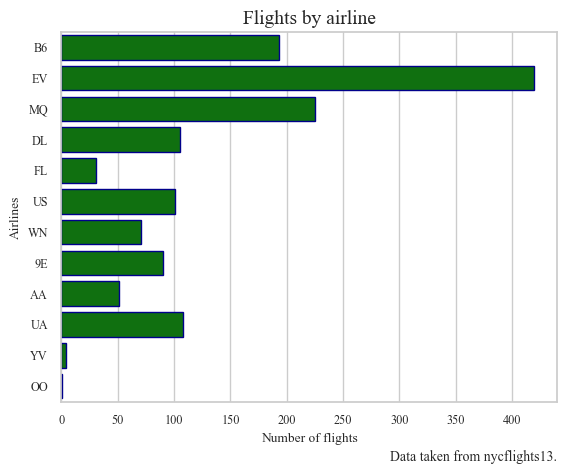

In [70]:
# create the plot
sns.countplot(y = flights_sep3['carrier'], 
              dodge=False,
              color = 'green', # specify the color scheme
              edgecolor='darkblue')

# Set the title and axis labels
plt.title("Flights by airline", fontsize=14)
plt.xlabel("Number of flights")
plt.ylabel("Airlines")
plt.text(1, -0.15, 'Data taken from nycflights13.', ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

We can also easily plot two groups categories, in separate columns for the second group.

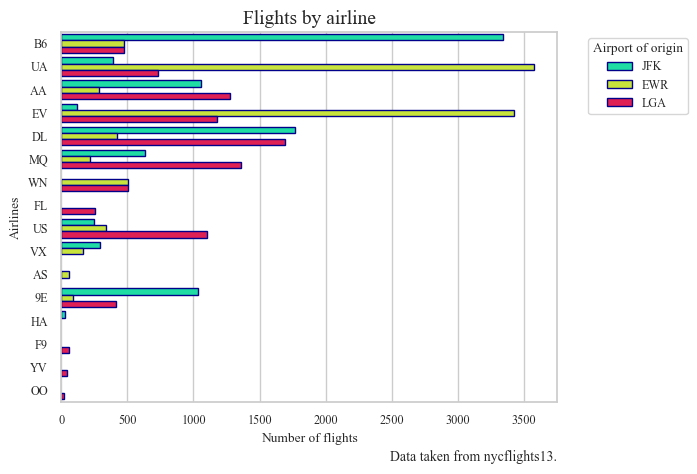

In [9]:
# create the plot
sns.countplot(y = flights_sep['carrier'], 
              hue = flights_sep['origin'], 
              dodge=True, # separate columns
              palette = 'gist_ncar', # specify the color scheme
              edgecolor='darkblue')

# Set the title and axis labels
plt.title("Flights by airline", fontsize=14)
plt.xlabel("Number of flights")
plt.ylabel("Airlines")
plt.text(1, -0.15, 'Data taken from nycflights13.', ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

# Change the legend title
legend = plt.gca().get_legend()  # Get legend created by Seaborn
legend.set_title('Airport of origin')  # change the title
legend.set_bbox_to_anchor((1.05, 1))  # move the legend out of the plot area

If we want a stacked plot, we can use the histogram function in Seaborn with the option multiple = 'stack'

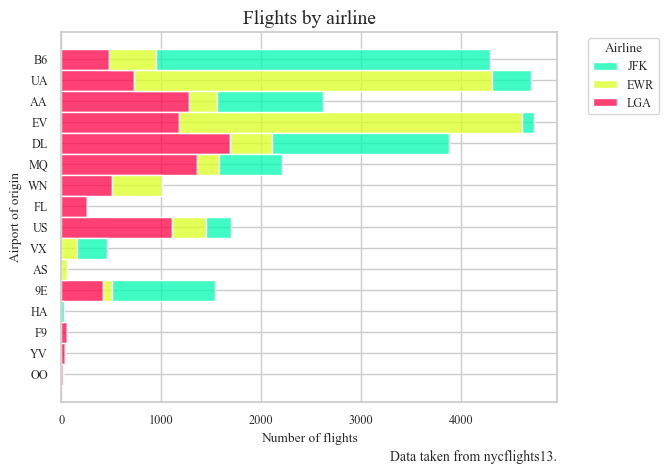

In [11]:
# create the plot (using the histogram function)
sns.histplot(hue = flights_sep['origin'], 
                  y = flights_sep['carrier'], 
                  multiple='stack', # stack for a stacked count plot
                  palette = 'gist_ncar')

# Set the title and axis labels
plt.title("Flights by airline", fontsize=14)
plt.xlabel("Number of flights")
plt.ylabel("Airport of origin")
plt.text(1, -0.15, 'Data taken from nycflights13.', ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

# Change the legend title
legend = plt.gca().get_legend()  # Get legend created by Seaborn
legend.set_title('Airline')  # change the title
legend.set_bbox_to_anchor((1.05, 1))  # move the legend out of the plot area


If we want a representation of percentages, we can use the same function with the option multiple = 'fill'

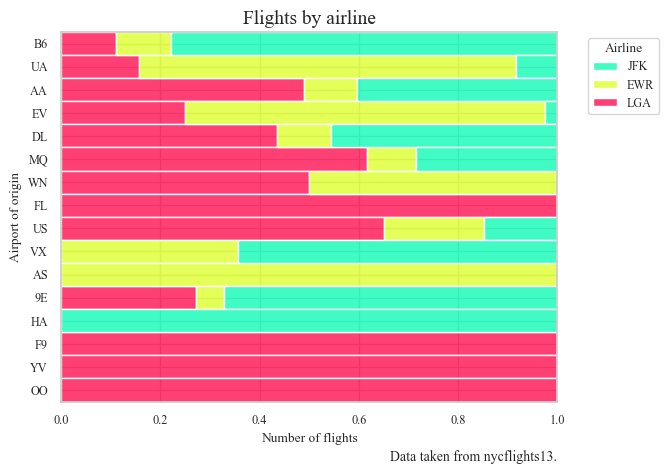

In [12]:
# create the plot (using the histogram function)
sns.histplot(hue = flights_sep['origin'], 
                  y = flights_sep['carrier'], 
                  multiple='fill', # fill for a percentage representation
                  palette = 'gist_ncar')

# Set the title and axis labels
plt.title("Flights by airline", fontsize=14)
plt.xlabel("Number of flights")
plt.ylabel("Airport of origin")
plt.text(1, -0.15, 'Data taken from nycflights13.', ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

# Change the legend title
legend = plt.gca().get_legend()  # Get legend created by Seaborn
legend.set_title('Airline')  # change the title
legend.set_bbox_to_anchor((1.05, 1))  # move the legend out of the plot area


## 4.4 Plotting 1 categorical and 1 metric variable

We can plot averages and other aggregate values for certain categories in bar and column plots.
You can prepare those aggregate values in separate calculations and use the aggregate data as input for the plots.
\
You can use Pandas Aggregation functions as estimators in these plots:\
mean() --> calculates the mean of a Pandas Series;\
median() --> calculates the median of a Pandas Series;\
min() --> calculates the minimum of a Pandas Series;\
max() --> calculates the maximum of a Pandas Series;\
std() --> calculates the standard deviation of a Pandas Series;\
var() --> calculates the variance of a Pandas Series;\
\
See: Python Data Science Handbook, Pandas chapter: Aggregation and Grouping/simple aggregation in Pandas

In [13]:
# Calculate the mean air time ba carrier
flights_sep.groupby('carrier')['air_time'].mean()

carrier
9E     86.752044
AA    179.369548
AS    314.500000
B6    144.489461
DL    164.945953
EV     86.164908
F9    217.178571
FL     92.256917
HA    607.520000
MQ     86.415950
OO     67.352941
UA    208.099008
US     80.211131
VX    325.513274
WN    141.102897
YV     74.214286
Name: air_time, dtype: float64

<Axes: ylabel='carrier'>

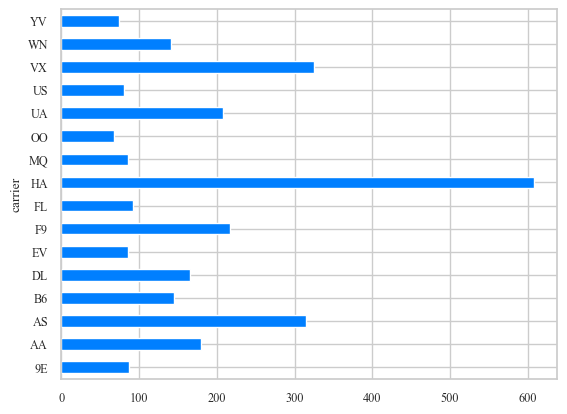

In [14]:
flights_sep.groupby('carrier')['air_time'].mean().plot.barh()

Let's make it presentable:

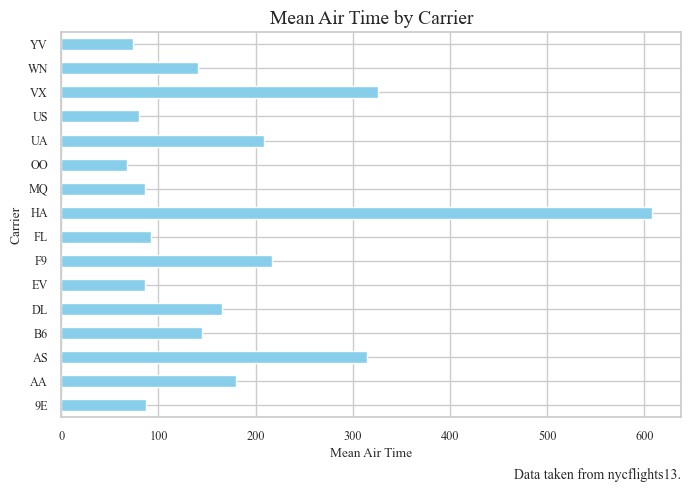

In [213]:
# Define figure size
plt.figure(figsize=(8, 5))

# Create the bar plot
flights_sep.groupby('carrier')['air_time'].mean().plot.barh(color='skyblue')

# Add labels and title
plt.ylabel('Carrier')
plt.xlabel('Mean Air Time')
plt.title('Mean Air Time by Carrier', fontsize = 14)
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)


You can also do these plots with Seaborn, and there are some additional features available:

<Axes: xlabel='air_time', ylabel='carrier'>

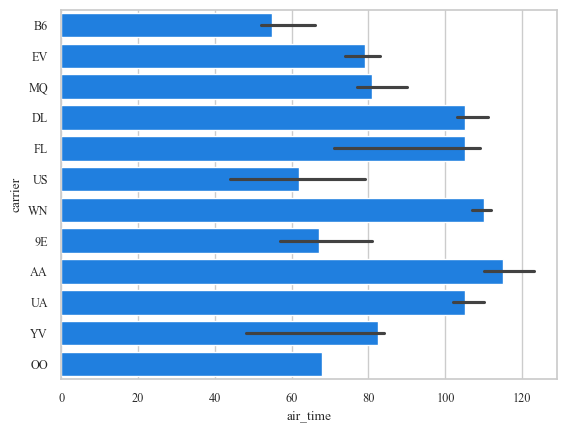

In [ ]:
# Barebones bar plot of means
sns.barplot(y = 'carrier', x = 'air_time', data = flights_sep3, # Alternative syntax: specify data set and variable names separately
            estimator='median' # different options available
            #errorbar = ("ci", 98), # get a 98% confidence intervall; disable with "None"
            )

Let's make it presentable:

Text(1, -0.15, 'Data taken from nycflights13.')

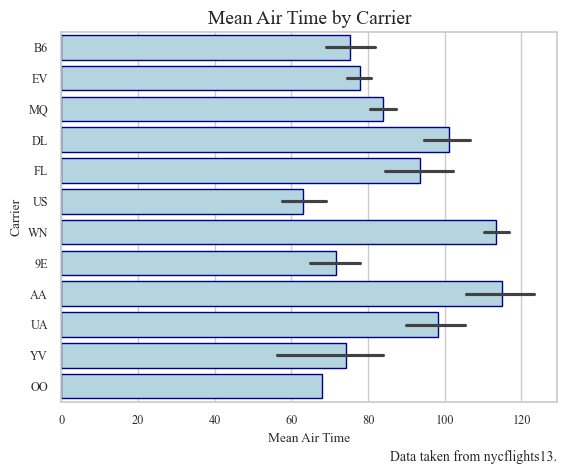

In [203]:
# make it presentable
sns.barplot(y = 'carrier', x = 'air_time', data = flights_sep3, 
            estimator='mean',
            errorbar = ("ci", 98), # get a 98% confidence intervall 
            color='lightblue',  edgecolor='darkblue'
            )
# Add labels and title
plt.ylabel('Carrier')
plt.xlabel('Mean Air Time')
plt.title('Mean Air Time by Carrier', fontsize = 14)
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

# 4. Histograms 

A histogram groups the values of a metric variable into groups, and then visualizes the sum of observations in these groups.

## 4.1 Plotting 1 metric variable
Seaborn is much more convenient to use here than the Matplotlib function, because it offers an option for binwidth. In Matplotlib, you can only specify the number of bins.

Let's try Matplotlib first:

(array([ 124., 1307., 2728.,  758., 1760., 2292.,  728., 4187.,  673.,
        1328., 3563.,  562.,   26.,  729.,  777.,  646.,  688.,    0.,
          30.,  204.,    0.,  336.,  546.,    0., 2248., 1279.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   55.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
        1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600.,
        2700., 2800., 2900., 3000., 3100., 3200., 3300., 3400., 3500.,
        3600., 3700., 3800., 3900., 4000., 4100., 4200., 4300., 4400.,
        4500., 4600., 4700., 4800., 4900., 5000.]),
 <BarContainer object of 50 artists>)

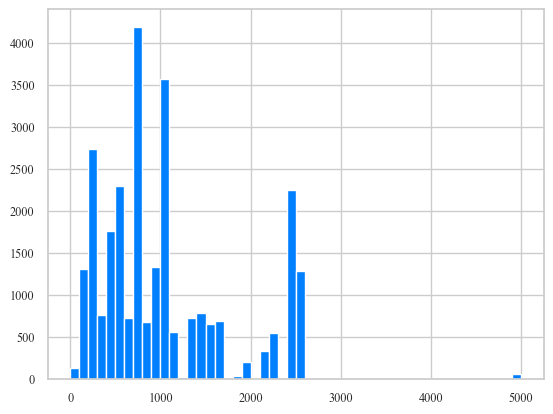

In [19]:
# Histogram with binwidth specified
plt.hist(x = flights_sep['distance'],
         # bins = 10) # either specify the number of bins
          bins=list(range(0, flights_sep['distance'].max() + 100, 100))) # create a list of bins with length 100 from 0 to he maximum distance


Let's make it presentable:

Text(1, -0.15, 'Data taken from nycflights13.')

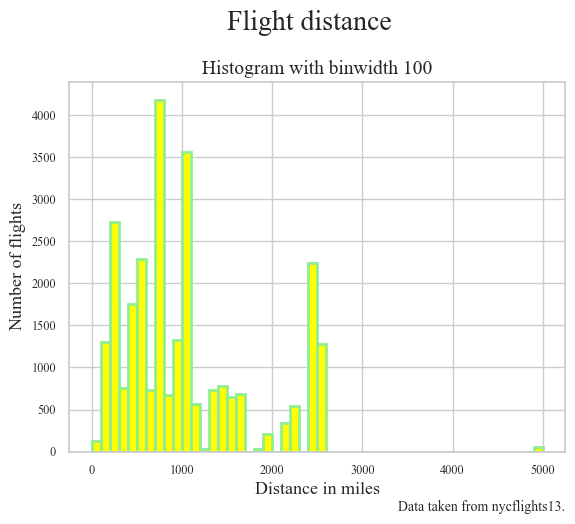

In [152]:
# make it presentable
plt.hist(x = flights_sep['distance'],
          bins=list(range(0, flights_sep['distance'].max() + 100, 100)),
          color = "yellow",
          edgecolor = "lightgreen", linewidth = 2)

plt.suptitle('Flight distance', fontsize = 20, y = 1.03)
plt.title('Histogram with binwidth 100', fontsize = 14)
plt.xlabel('Distance in miles', fontsize = 13)
plt.ylabel('Number of flights', fontsize = 13)
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

For comparison, the Seaborn histogram function is more convenient regarding binwidth:

<Axes: xlabel='distance', ylabel='Count'>

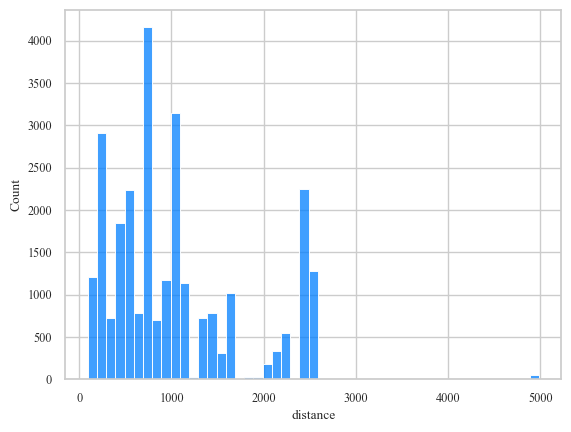

In [20]:
# Seaborn bare bones histogram
sns.histplot(x = flights_sep['distance'], binwidth = 100)

Let's make it presentable.

Text(1, -0.15, 'Data taken from nycflights13.')

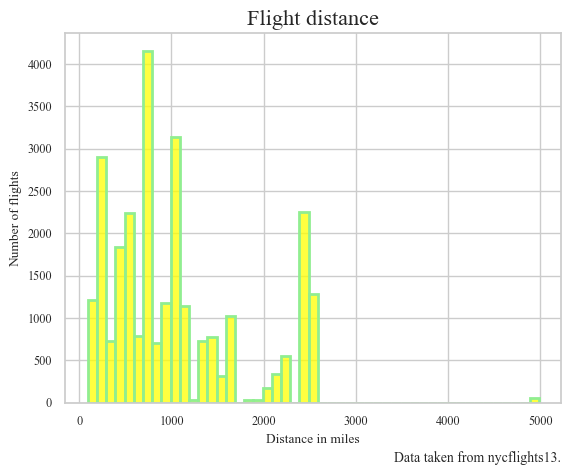

In [21]:
# The syntax is different from Matplotlib 
Plot_2 = sns.histplot(flights_sep['distance'], 
                      binwidth=100, 
                      color='yellow', edgecolor='lightgreen', linewidth = 2)
Plot_2.set(# title = 'Distance in miles', # comes out too small
           ylabel ='Number of flights',
           xlabel ='Distance in miles')
Plot_2.set_title(label = "Flight distance", fontsize = 16)
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

## 4.2 Plotting one metric and one categorical variable

You can also add information about a categorical variable to a histogram, using the options for color. Let's stick to Seaborn here and add the airport of origin:

<Axes: xlabel='distance', ylabel='Count'>

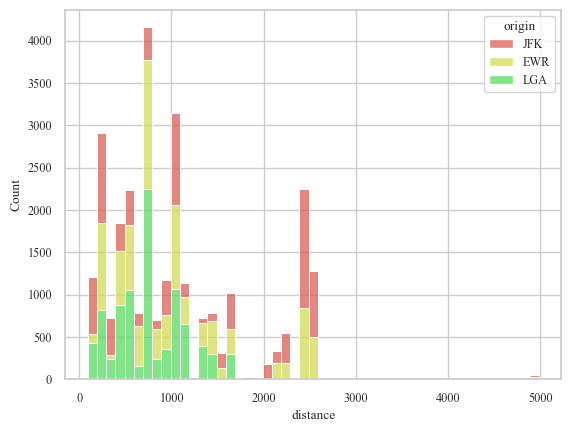

In [24]:
# Seaborn histogram with categorical information, bare bones:
sns.histplot(x = flights_sep['distance'], 
             hue=flights_sep['origin'],
             multiple='stack', # keep categories separate
             binwidth = 100)

Let's and make it presentable:

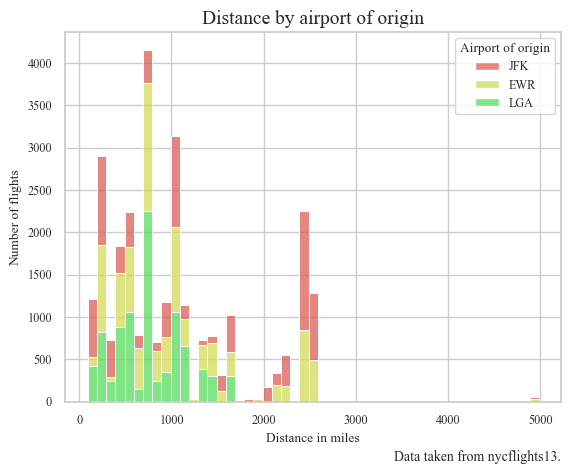

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram with Seaborn
sns.histplot(x = flights_sep['distance'], 
             hue=flights_sep['origin'],
             multiple='stack', # keep categories separate
             binwidth = 100)

# Set the title and axis labels
plt.title("Distance by airport of origin", fontsize=14)
plt.xlabel('Distance in miles')
plt.ylabel("Number of flights")
plt.text(1, -0.15, 'Data taken from nycflights13.', ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

# Change the legend title
legend = plt.gca().get_legend()  # Get legend created by Seaborn
legend.set_title('Airport of origin')  # change the title

# 5. Boxplots

A boxplot can illustrate the distribution of metric (or ordinal) variables in a different way than a histogram.

The box corresponds to the middle 50% of the data, and the observations above and below the box correspond to the upper and lower quartile. The line accross the box corresponds to the median of the data. The whiskers represent the values of the upper and lower quartile, provided they are within 1.5 time the inter-quartile distance (i.e. the distance spanned by the box). Values beyond this distance are considered outliers and represented as points. Seaborn has a very good function:


## 5.1 Visualizing 1 metric variable

<Axes: ylabel='air_time'>

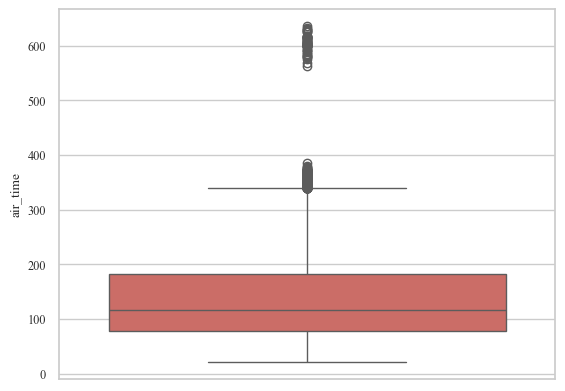

In [26]:
# Seaborn barebones boxplot
sns.boxplot(flights_sep['air_time'])

Make it presentable. Here, adjusting the size of the plot is particularly useful.

([<matplotlib.axis.YTick at 0x127b2a6d0>,
 [Text(0, 0, '0'),
  Text(0, 60, '60'),
  Text(0, 120, '120'),
  Text(0, 180, '180'),
  Text(0, 240, '240'),
  Text(0, 300, '300'),
  Text(0, 360, '360'),
  Text(0, 420, '420'),
  Text(0, 480, '480'),
  Text(0, 540, '540'),
  Text(0, 600, '600')])

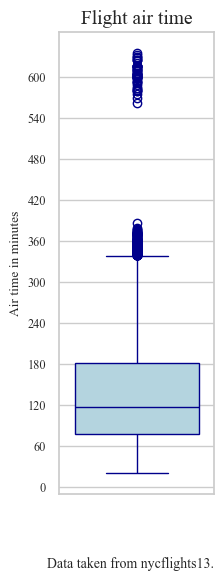

In [28]:
# Plain version
plt.figure(figsize=(2, 6)) # control the length and width

# create a subplot
sns.boxplot(flights_sep['air_time'], color = "lightblue", linecolor = "darkblue")

# Set the title and axis labels
plt.title("Flight air time", fontsize = 14)
plt.ylabel(ylabel='Air time in minutes')
plt.text(1, -0.15, 'Data taken from nycflights13.', ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)
plt.yticks(ticks = np.arange(0, 660, 60)) 

Another option is to save the plot as an object and then to adjust its elements.

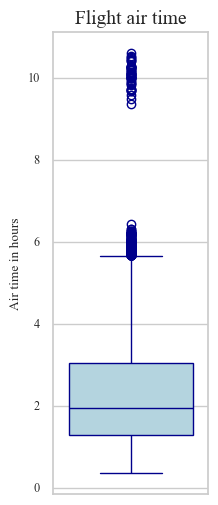

In [272]:
# Option: create a subplot object
plt.figure(figsize=(2, 6)) # control the length and width

# create a subplot
boxplot = sns.boxplot(flights_sep['air_time']/60,  
                      color = "lightblue", 
                      linecolor = "darkblue")

# set the title and labels
boxplot.set_title("Flight air time", fontsize = 14)
boxplot.set(ylabel='Air time in hours')

# save the plot (if necessary)
plt.savefig('Plot_4.png')

# show the plot (if necessary)
plt.show()

## 5.2 Plotting 1 metric and 1 categorical variable

We can plot several boxplots to compare the distribution of a continuous variable in several categories. For example, we may want to know how arrival delays differ between airlines.


<Axes: xlabel='carrier', ylabel='arr_delay'>

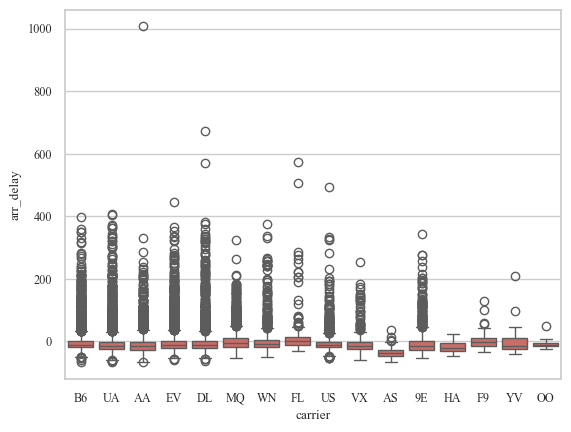

In [29]:
# Barebones boxplots for multiple categories
sns.boxplot(x = flights_sep['carrier'], y = flights_sep['arr_delay'])

Make it presentable. Here we use a different way of adjusting the graphics: we first save the plot as an object and then adjust its elements.
Also, we can easily flip the plot by switching the x and y variables.

Text(1, -0.15, 'Data taken from nycflights13.')

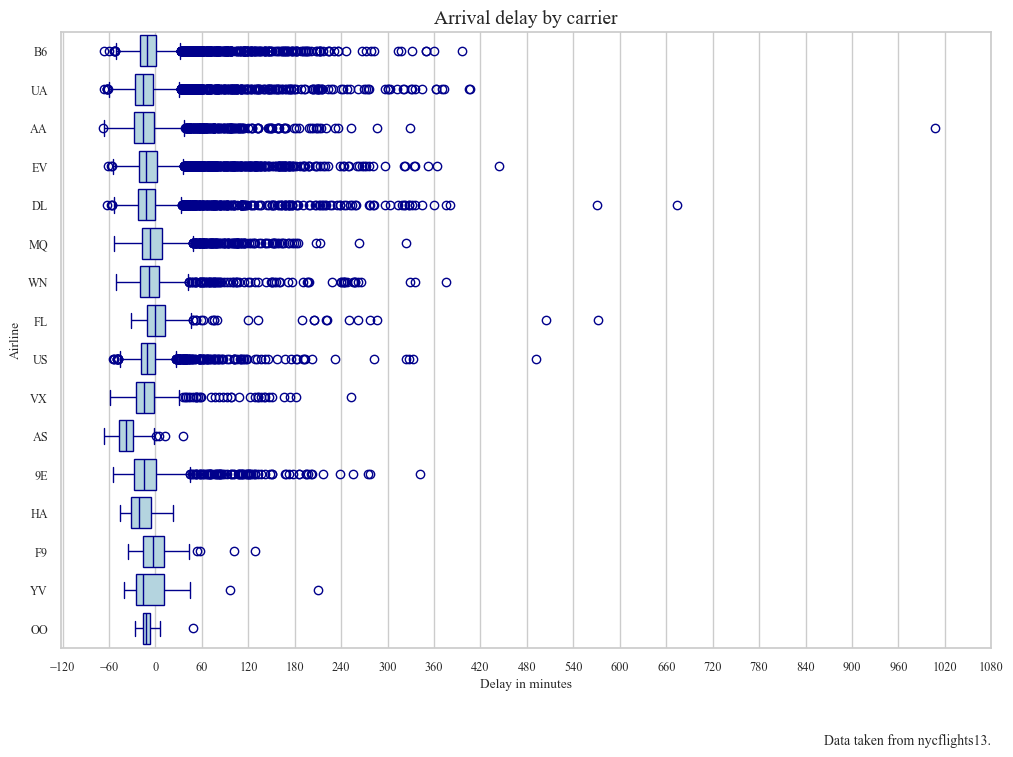

In [30]:
# make it presentable and save it
# create a new figure
plt.figure(figsize=(12, 8))

# create a subplot
boxplot = sns.boxplot(y = flights_sep['carrier'], x = flights_sep['arr_delay'], 
                      color='lightblue',  linecolor='darkblue')
# set the title and labels
boxplot.set_title("Arrival delay by carrier", fontsize = 14),
boxplot.set(xticks=np.arange(-120, 1100, 60), # adjust the ticks on the x axis
            xlabel='Delay in minutes',
            ylabel = "Airline")
plt.text(1, -0.15, 'Data taken from nycflights13.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)